In [1]:
import time
import pandas as pd
import urllib.request
import requests
import bs4
from collections import Counter
import konlpy
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
tagger=Hannanum()
check = ['경향신문','국민일보','동아일보','문화일보','서울신문','세계일보','조선일보','중앙일보','한겨레','한국일보','뉴스1','뉴시스','연합뉴스','채널A','한국경제TV','JTBC','KBS','MBC','MBN','SBS','TV조선','YTN','노컷뉴스','데일리안','미디어오늘','아이뉴스24','오마이뉴스','프레시안','디지털데일리','디지털타임스','블로터','전자신문','ZDNet Korea']
stopwords = ['단독','논란','구독','뉴스','채널','네이버','연합뉴스','금지','재배포','오후','오전','이후','이날','사진','콘텐츠','영상편집','영상취재','기자','만원','때문']

In [3]:
age = "age20"

In [4]:
folder1 = "C:/marketing3/" + age + "_1"
folder2 = "C:/marketing3/" + age + "_2"
folder3 = "C:/marketing3/" + age + "_3"
foldert = "C:/marketing3/" + age + "_t"

In [5]:
data = pd.read_excel(foldert + "/" + age + ".xlsx")
data

,날짜,실검
0,2021-03-04,47.61136
1,2021-03-05,39.58539
2,2021-03-06,29.21817
3,2021-03-07,22.82562
4,2021-03-08,23.03535
...,...,...
793,2023-05-06,0.76831
794,2023-05-07,0.91149
795,2023-05-08,4.05936
796,2023-05-09,7.03180


In [6]:
a = data.sort_values("실검", ascending = False, ignore_index = True)[:100]
print(a)
b = []
for i in range(100):
    b.append(str(a.loc[i, "날짜"])[:10].replace("-",""))
b[:5]

            날짜         실검
0   2021-05-05  100.00000
1   2021-10-25   60.80380
2   2022-10-15   54.27413
3   2021-03-04   47.61136
4   2021-03-05   39.58539
..         ...        ...
95  2021-12-13    6.10215
96  2021-10-26    6.00939
97  2021-05-01    5.93680
98  2021-05-08    5.92671
99  2021-06-04    5.90655

[100 rows x 2 columns]


['20210505', '20211025', '20221015', '20210304', '20210305']

In [7]:
w = list(a["실검"].apply(lambda x:x/100))
w[:10]

[1.0,
 0.6080380000000001,
 0.5427413,
 0.47611359999999997,
 0.3958539,
 0.2921817,
 0.2816753,
 0.2696767,
 0.2580209,
 0.2477162]

In [8]:
e = []
for n, y in enumerate(b):
    e.append((n,y))
e[:10]

[(0, '20210505'),
 (1, '20211025'),
 (2, '20221015'),
 (3, '20210304'),
 (4, '20210305'),
 (5, '20210306'),
 (6, '20211005'),
 (7, '20221030'),
 (8, '20210310'),
 (9, '20210309')]

In [9]:
len(e)

100

In [10]:
error = []
for n, y in e:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Date','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, y, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv(folder1 + '/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        error.append(1)
    else:
        print("Done")
        error.append(0)

n = 0 y = 20210505
Done
n = 1 y = 20211025
Done
n = 2 y = 20221015
ERROR1
n = 3 y = 20210304
Done
n = 4 y = 20210305
Done
n = 5 y = 20210306
Done
n = 6 y = 20211005
Done
n = 7 y = 20221030
Done
n = 8 y = 20210310
Done
n = 9 y = 20210309
Done
n = 10 y = 20210323
Done
n = 11 y = 20210312
Done
n = 12 y = 20210320
Done
n = 13 y = 20210308
ERROR1
n = 14 y = 20210307
Done
n = 15 y = 20230420
Done
n = 16 y = 20210311
Done
n = 17 y = 20210313
Done
n = 18 y = 20210314
Done
n = 19 y = 20210325
Done
n = 20 y = 20210315
Done
n = 21 y = 20210316
Done
n = 22 y = 20210412
Done
n = 23 y = 20230129
Done
n = 24 y = 20221230
Done
n = 25 y = 20210506
Done
n = 26 y = 20210324
Done
n = 27 y = 20211123
Done
n = 28 y = 20210317
Done
n = 29 y = 20210326
Done
n = 30 y = 20210318
Done
n = 31 y = 20211018
Done
n = 32 y = 20211002
Done
n = 33 y = 20210319
Done
n = 34 y = 20210329
Done
n = 35 y = 20220608
Done
n = 36 y = 20210327
Done
n = 37 y = 20220224
ERROR1
n = 38 y = 20210607
Done
n = 39 y = 20210407
ERROR1
n 

In [11]:
retry = [e[i] for i in range(len(error)) if error[i] == 1]
print(len(retry))
print("="*25)
print(retry)

9
[(2, '20221015'), (13, '20210308'), (37, '20220224'), (39, '20210407'), (45, '20210330'), (48, '20210513'), (60, '20210609'), (82, '20210504'), (93, '20210716')]


In [12]:
error2 = []
for n, y in retry:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Date','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, y, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv(folder1 + '/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        error2.append(1)
    else:
        print("Done")
        error2.append(0)

n = 2 y = 20221015
Done
n = 13 y = 20210308
Done
n = 37 y = 20220224
Done
n = 39 y = 20210407
Done
n = 45 y = 20210330
Done
n = 48 y = 20210513
Done
n = 60 y = 20210609
Done
n = 82 y = 20210504
Done
n = 93 y = 20210716
Done


In [13]:
retry2 = [retry[i] for i in range(len(error2)) if error2[i] == 1]
print(len(retry2))
print("="*25)
print(retry2)

0
[]


---

In [14]:
url = []
date = []
total = 0
for i in range(len(e)):
    news = pd.read_csv(folder1 + '/df' + str(i) + ".csv", encoding="utf-8-sig")
    date.extend(news["Date"])
    url.extend(news["URL"])
    total += len(news["URL"])

In [15]:
print(total)
print(len(date))
print(len(url))

16470
16470
16470


In [16]:
print(date[:5])
print("=" * 30)
print(url[:2])
print("=" * 30)

[20210505, 20210505, 20210505, 20210505, 20210505]
['https://n.news.naver.com/article/214/0001116785?ntype=RANKING', 'https://n.news.naver.com/article/214/0001116664?ntype=RANKING']


In [17]:
news_url = []
for n, y in enumerate(url):
    news_url.append((n,y))
num = len(news_url)
print(num)

16470


In [18]:
news_url[:2]

[(0, 'https://n.news.naver.com/article/214/0001116785?ntype=RANKING'),
 (1, 'https://n.news.naver.com/article/214/0001116664?ntype=RANKING')]

In [19]:
con_error = []
con = []

In [20]:
for idx, u in news_url:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con.append([idx, " "])
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        con_error.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con.append([idx, title.text])
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                con_error.append((idx, 2))
            else: con.append([idx, contents])
        else:
            print("ERROR1")
            con.append([idx, " "])
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            con_error.append((idx, 1))
            continue
        if idx >= num-5:
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        print("Done")
        con_error.append((idx, 0))

idx = 0
Done
idx = 1
Done
idx = 2
Done
idx = 3
Done
idx = 4
Done
idx = 5
Done
idx = 6
Done
idx = 7
Done
idx = 8
Done
idx = 9
Done
idx = 10
Done
idx = 11
Done
idx = 12
Done
idx = 13
Done
idx = 14
Done
idx = 15
Done
idx = 16
Done
idx = 17
Done
idx = 18
Done
idx = 19
Done
idx = 20
Done
idx = 21
Done
idx = 22
Done
idx = 23
Done
idx = 24
Done
idx = 25
Done
idx = 26
Done
idx = 27
Done
idx = 28
Done
idx = 29
Done
idx = 30
Done
idx = 31
Done
idx = 32
Done
idx = 33
Done
idx = 34
Done
idx = 35
Done
idx = 36
Done
idx = 37
Done
idx = 38
Done
idx = 39
Done
idx = 40
Done
idx = 41
Done
idx = 42
Done
idx = 43
Done
idx = 44
Done
idx = 45
Done
idx = 46
Done
idx = 47
Done
idx = 48
Done
idx = 49
Done
idx = 50
Done
idx = 51
Done
idx = 52
Done
idx = 53
Done
idx = 54
Done
idx = 55
Done
idx = 56
Done
idx = 57
Done
idx = 58
Done
idx = 59
Done
idx = 60
Done
idx = 61
Done
idx = 62
Done
idx = 63
Done
idx = 64
Done
idx = 65
Done
idx = 66
Done
idx = 67
Done
idx = 68
Done
idx = 69
Done
idx = 70
Done
idx = 71
Done
id

Done
idx = 554
Done
idx = 555
Done
idx = 556
Done
idx = 557
Done
idx = 558
Done
idx = 559
Done
idx = 560
Done
idx = 561
Done
idx = 562
Done
idx = 563
Done
idx = 564
Done
idx = 565
Done
idx = 566
Done
idx = 567
Done
idx = 568
Done
idx = 569
Done
idx = 570
Done
idx = 571
Done
idx = 572
Done
idx = 573
Done
idx = 574
Done
idx = 575
Done
idx = 576
Done
idx = 577
Done
idx = 578
Done
idx = 579
Done
idx = 580
Done
idx = 581
Done
idx = 582
Done
idx = 583
Done
idx = 584
Done
idx = 585
Done
idx = 586
Done
idx = 587
Done
idx = 588
Done
idx = 589
Done
idx = 590
Done
idx = 591
Done
idx = 592
Done
idx = 593
Done
idx = 594
Done
idx = 595
Done
idx = 596
Done
idx = 597
Done
idx = 598
Done
idx = 599
Done
idx = 600
Done
idx = 601
Done
idx = 602
Done
idx = 603
Done
idx = 604
Done
idx = 605
Done
idx = 606
Done
idx = 607
Done
idx = 608
Done
idx = 609
Done
idx = 610
Done
idx = 611
Done
idx = 612
Done
idx = 613
Done
idx = 614
Done
idx = 615
Done
idx = 616
Done
idx = 617
Done
idx = 618
Done
idx = 619
Done
idx =

Done
idx = 1094
Done
idx = 1095
Done
idx = 1096
Done
idx = 1097
Done
idx = 1098
Done
idx = 1099
Done
idx = 1100
Done
idx = 1101
Done
idx = 1102
Done
idx = 1103
Done
idx = 1104
Done
idx = 1105
Done
idx = 1106
Done
idx = 1107
Done
idx = 1108
Done
idx = 1109
Done
idx = 1110
Done
idx = 1111
Done
idx = 1112
Done
idx = 1113
Done
idx = 1114
Done
idx = 1115
Done
idx = 1116
Done
idx = 1117
Done
idx = 1118
Done
idx = 1119
Done
idx = 1120
Done
idx = 1121
Done
idx = 1122
Done
idx = 1123
Done
idx = 1124
Done
idx = 1125
Done
idx = 1126
Done
idx = 1127
Done
idx = 1128
Done
idx = 1129
Done
idx = 1130
Done
idx = 1131
Done
idx = 1132
Done
idx = 1133
Done
idx = 1134
Done
idx = 1135
Done
idx = 1136
Done
idx = 1137
Done
idx = 1138
Done
idx = 1139
Done
idx = 1140
Done
idx = 1141
Done
idx = 1142
Done
idx = 1143
Done
idx = 1144
Done
idx = 1145
Done
idx = 1146
Done
idx = 1147
Done
idx = 1148
Done
idx = 1149
Done
idx = 1150
Done
idx = 1151
Done
idx = 1152
Done
idx = 1153
Done
idx = 1154
Done
idx = 1155
Done
idx

Done
idx = 1607
Done
idx = 1608
Done
idx = 1609
Done
idx = 1610
Done
idx = 1611
Done
idx = 1612
Done
idx = 1613
Done
idx = 1614
Done
idx = 1615
Done
idx = 1616
Done
idx = 1617
Done
idx = 1618
Done
idx = 1619
Done
idx = 1620
Done
idx = 1621
Done
idx = 1622
Done
idx = 1623
Done
idx = 1624
Done
idx = 1625
Done
idx = 1626
Done
idx = 1627
Done
idx = 1628
Done
idx = 1629
Done
idx = 1630
Done
idx = 1631
Done
idx = 1632
Done
idx = 1633
Done
idx = 1634
Done
idx = 1635
Done
idx = 1636
Done
idx = 1637
Done
idx = 1638
Done
idx = 1639
Done
idx = 1640
Done
idx = 1641
Done
idx = 1642
Done
idx = 1643
Done
idx = 1644
Done
idx = 1645
Done
idx = 1646
Done
idx = 1647
Done
idx = 1648
Done
idx = 1649
Done
idx = 1650
Done
idx = 1651
Done
idx = 1652
Done
idx = 1653
Done
idx = 1654
Done
idx = 1655
Done
idx = 1656
Done
idx = 1657
Done
idx = 1658
Done
idx = 1659
Done
idx = 1660
Done
idx = 1661
Done
idx = 1662
Done
idx = 1663
Done
idx = 1664
Done
idx = 1665
Done
idx = 1666
Done
idx = 1667
Done
idx = 1668
Done
idx

Done
idx = 2120
Done
idx = 2121
Done
idx = 2122
Done
idx = 2123
Done
idx = 2124
Done
idx = 2125
Done
idx = 2126
Done
idx = 2127
Done
idx = 2128
Done
idx = 2129
Done
idx = 2130
Done
idx = 2131
Done
idx = 2132
Done
idx = 2133
Done
idx = 2134
Done
idx = 2135
Done
idx = 2136
Done
idx = 2137
Done
idx = 2138
Done
idx = 2139
Done
idx = 2140
Done
idx = 2141
Done
idx = 2142
Done
idx = 2143
Done
idx = 2144
Done
idx = 2145
Done
idx = 2146
Done
idx = 2147
Done
idx = 2148
Done
idx = 2149
Done
idx = 2150
Done
idx = 2151
Done
idx = 2152
Done
idx = 2153
Done
idx = 2154
Done
idx = 2155
Done
idx = 2156
Done
idx = 2157
Done
idx = 2158
Done
idx = 2159
Done
idx = 2160
Done
idx = 2161
Done
idx = 2162
Done
idx = 2163
Done
idx = 2164
Done
idx = 2165
Done
idx = 2166
Done
idx = 2167
Done
idx = 2168
Done
idx = 2169
Done
idx = 2170
Done
idx = 2171
Done
idx = 2172
Done
idx = 2173
Done
idx = 2174
Done
idx = 2175
Done
idx = 2176
Done
idx = 2177
Done
idx = 2178
Done
idx = 2179
Done
idx = 2180
Done
idx = 2181
Done
idx

Done
idx = 2632
Done
idx = 2633
Done
idx = 2634
Done
idx = 2635
Done
idx = 2636
Done
idx = 2637
Done
idx = 2638
Done
idx = 2639
Done
idx = 2640
Done
idx = 2641
Done
idx = 2642
Done
idx = 2643
Done
idx = 2644
Done
idx = 2645
Done
idx = 2646
Done
idx = 2647
Done
idx = 2648
Done
idx = 2649
Done
idx = 2650
Done
idx = 2651
Done
idx = 2652
Done
idx = 2653
Done
idx = 2654
Done
idx = 2655
Done
idx = 2656
Done
idx = 2657
Done
idx = 2658
Done
idx = 2659
Done
idx = 2660
Done
idx = 2661
Done
idx = 2662
Done
idx = 2663
Done
idx = 2664
Done
idx = 2665
Done
idx = 2666
Done
idx = 2667
Done
idx = 2668
Done
idx = 2669
Done
idx = 2670
Done
idx = 2671
Done
idx = 2672
Done
idx = 2673
Done
idx = 2674
Done
idx = 2675
Done
idx = 2676
Done
idx = 2677
Done
idx = 2678
Done
idx = 2679
Done
idx = 2680
Done
idx = 2681
Done
idx = 2682
Done
idx = 2683
Done
idx = 2684
Done
idx = 2685
Done
idx = 2686
Done
idx = 2687
Done
idx = 2688
Done
idx = 2689
Done
idx = 2690
Done
idx = 2691
Done
idx = 2692
Done
idx = 2693
Done
idx

Done
idx = 3144
Done
idx = 3145
Done
idx = 3146
Done
idx = 3147
Done
idx = 3148
Done
idx = 3149
Done
idx = 3150
Done
idx = 3151
Done
idx = 3152
Done
idx = 3153
Done
idx = 3154
Done
idx = 3155
Done
idx = 3156
Done
idx = 3157
Done
idx = 3158
Done
idx = 3159
Done
idx = 3160
Done
idx = 3161
Done
idx = 3162
Done
idx = 3163
Done
idx = 3164
Done
idx = 3165
Done
idx = 3166
Done
idx = 3167
Done
idx = 3168
Done
idx = 3169
Done
idx = 3170
Done
idx = 3171
Done
idx = 3172
Done
idx = 3173
Done
idx = 3174
Done
idx = 3175
Done
idx = 3176
Done
idx = 3177
Done
idx = 3178
Done
idx = 3179
Done
idx = 3180
Done
idx = 3181
Done
idx = 3182
Done
idx = 3183
Done
idx = 3184
Done
idx = 3185
Done
idx = 3186
Done
idx = 3187
Done
idx = 3188
Done
idx = 3189
Done
idx = 3190
Done
idx = 3191
Done
idx = 3192
Done
idx = 3193
Done
idx = 3194
Done
idx = 3195
Done
idx = 3196
Done
idx = 3197
Done
idx = 3198
Done
idx = 3199
Done
idx = 3200
Done
idx = 3201
Done
idx = 3202
Done
idx = 3203
Done
idx = 3204
Done
idx = 3205
Done
idx

Done
idx = 3657
Done
idx = 3658
Done
idx = 3659
Done
idx = 3660
Done
idx = 3661
Done
idx = 3662
Done
idx = 3663
Done
idx = 3664
Done
idx = 3665
Done
idx = 3666
Done
idx = 3667
Done
idx = 3668
Done
idx = 3669
Done
idx = 3670
Done
idx = 3671
Done
idx = 3672
Done
idx = 3673
Done
idx = 3674
Done
idx = 3675
Done
idx = 3676
Done
idx = 3677
Done
idx = 3678
Done
idx = 3679
Done
idx = 3680
Done
idx = 3681
Done
idx = 3682
Done
idx = 3683
Done
idx = 3684
Done
idx = 3685
Done
idx = 3686
Done
idx = 3687
Done
idx = 3688
Done
idx = 3689
Done
idx = 3690
Done
idx = 3691
Done
idx = 3692
Done
idx = 3693
Done
idx = 3694
Done
idx = 3695
Done
idx = 3696
Done
idx = 3697
Done
idx = 3698
Done
idx = 3699
Done
idx = 3700
Done
idx = 3701
Done
idx = 3702
Done
idx = 3703
Done
idx = 3704
Done
idx = 3705
Done
idx = 3706
Done
idx = 3707
Done
idx = 3708
Done
idx = 3709
Done
idx = 3710
Done
idx = 3711
Done
idx = 3712
Done
idx = 3713
Done
idx = 3714
Done
idx = 3715
Done
idx = 3716
Done
idx = 3717
Done
idx = 3718
Done
idx

Done
idx = 4169
Done
idx = 4170
Done
idx = 4171
Done
idx = 4172
Done
idx = 4173
Done
idx = 4174
Done
idx = 4175
Done
idx = 4176
Done
idx = 4177
Done
idx = 4178
Done
idx = 4179
Done
idx = 4180
Done
idx = 4181
Done
idx = 4182
Done
idx = 4183
Done
idx = 4184
Done
idx = 4185
Done
idx = 4186
Done
idx = 4187
Done
idx = 4188
Done
idx = 4189
Done
idx = 4190
Done
idx = 4191
Done
idx = 4192
Done
idx = 4193
Done
idx = 4194
Done
idx = 4195
Done
idx = 4196
Done
idx = 4197
Done
idx = 4198
Done
idx = 4199
Done
idx = 4200
Done
idx = 4201
Done
idx = 4202
Done
idx = 4203
Done
idx = 4204
Done
idx = 4205
Done
idx = 4206
Done
idx = 4207
Done
idx = 4208
Done
idx = 4209
Done
idx = 4210
Done
idx = 4211
Done
idx = 4212
Done
idx = 4213
Done
idx = 4214
Done
idx = 4215
Done
idx = 4216
Done
idx = 4217
Done
idx = 4218
Done
idx = 4219
Done
idx = 4220
Done
idx = 4221
Done
idx = 4222
Done
idx = 4223
Done
idx = 4224
Done
idx = 4225
Done
idx = 4226
Done
idx = 4227
Done
idx = 4228
Done
idx = 4229
Done
idx = 4230
Done
idx

Done
idx = 4682
Done
idx = 4683
Done
idx = 4684
Done
idx = 4685
Done
idx = 4686
Done
idx = 4687
Done
idx = 4688
Done
idx = 4689
Done
idx = 4690
Done
idx = 4691
Done
idx = 4692
Done
idx = 4693
Done
idx = 4694
Done
idx = 4695
Done
idx = 4696
Done
idx = 4697
Done
idx = 4698
Done
idx = 4699
Done
idx = 4700
Done
idx = 4701
Done
idx = 4702
Done
idx = 4703
Done
idx = 4704
Done
idx = 4705
Done
idx = 4706
Done
idx = 4707
Done
idx = 4708
Done
idx = 4709
Done
idx = 4710
Done
idx = 4711
Done
idx = 4712
Done
idx = 4713
Done
idx = 4714
Done
idx = 4715
Done
idx = 4716
Done
idx = 4717
Done
idx = 4718
Done
idx = 4719
Done
idx = 4720
Done
idx = 4721
Done
idx = 4722
Done
idx = 4723
Done
idx = 4724
Done
idx = 4725
Done
idx = 4726
Done
idx = 4727
Done
idx = 4728
Done
idx = 4729
Done
idx = 4730
Done
idx = 4731
Done
idx = 4732
Done
idx = 4733
Done
idx = 4734
Done
idx = 4735
Done
idx = 4736
Done
idx = 4737
Done
idx = 4738
Done
idx = 4739
Done
idx = 4740
Done
idx = 4741
Done
idx = 4742
Done
idx = 4743
Done
idx

Done
idx = 5195
Done
idx = 5196
Done
idx = 5197
Done
idx = 5198
Done
idx = 5199
Done
idx = 5200
Done
idx = 5201
Done
idx = 5202
Done
idx = 5203
Done
idx = 5204
Done
idx = 5205
Done
idx = 5206
Done
idx = 5207
Done
idx = 5208
Done
idx = 5209
Done
idx = 5210
Done
idx = 5211
Done
idx = 5212
Done
idx = 5213
Done
idx = 5214
Done
idx = 5215
Done
idx = 5216
Done
idx = 5217
Done
idx = 5218
Done
idx = 5219
Done
idx = 5220
Done
idx = 5221
Done
idx = 5222
Done
idx = 5223
Done
idx = 5224
Done
idx = 5225
Done
idx = 5226
Done
idx = 5227
Done
idx = 5228
Done
idx = 5229
Done
idx = 5230
Done
idx = 5231
Done
idx = 5232
Done
idx = 5233
Done
idx = 5234
Done
idx = 5235
Done
idx = 5236
Done
idx = 5237
Done
idx = 5238
Done
idx = 5239
Done
idx = 5240
Done
idx = 5241
Done
idx = 5242
Done
idx = 5243
Done
idx = 5244
Done
idx = 5245
Done
idx = 5246
Done
idx = 5247
Done
idx = 5248
Done
idx = 5249
Done
idx = 5250
Done
idx = 5251
Done
idx = 5252
Done
idx = 5253
Done
idx = 5254
Done
idx = 5255
Done
idx = 5256
Done
idx

Done
idx = 5707
Done
idx = 5708
Done
idx = 5709
Done
idx = 5710
Done
idx = 5711
Done
idx = 5712
Done
idx = 5713
Done
idx = 5714
Done
idx = 5715
Done
idx = 5716
Done
idx = 5717
Done
idx = 5718
Done
idx = 5719
Done
idx = 5720
Done
idx = 5721
Done
idx = 5722
Done
idx = 5723
Done
idx = 5724
Done
idx = 5725
Done
idx = 5726
Done
idx = 5727
Done
idx = 5728
Done
idx = 5729
Done
idx = 5730
Done
idx = 5731
Done
idx = 5732
Done
idx = 5733
Done
idx = 5734
Done
idx = 5735
Done
idx = 5736
Done
idx = 5737
Done
idx = 5738
Done
idx = 5739
Done
idx = 5740
Done
idx = 5741
Done
idx = 5742
Done
idx = 5743
Done
idx = 5744
Done
idx = 5745
Done
idx = 5746
Done
idx = 5747
Done
idx = 5748
Done
idx = 5749
Done
idx = 5750
Done
idx = 5751
Done
idx = 5752
Done
idx = 5753
Done
idx = 5754
Done
idx = 5755
Done
idx = 5756
Done
idx = 5757
Done
idx = 5758
Done
idx = 5759
Done
idx = 5760
Done
idx = 5761
Done
idx = 5762
Done
idx = 5763
Done
idx = 5764
Done
idx = 5765
Done
idx = 5766
Done
idx = 5767
Done
idx = 5768
Done
idx

Done
idx = 6219
Done
idx = 6220
Done
idx = 6221
Done
idx = 6222
Done
idx = 6223
Done
idx = 6224
Done
idx = 6225
Done
idx = 6226
Done
idx = 6227
Done
idx = 6228
Done
idx = 6229
Done
idx = 6230
Done
idx = 6231
Done
idx = 6232
Done
idx = 6233
Done
idx = 6234
Done
idx = 6235
Done
idx = 6236
Done
idx = 6237
Done
idx = 6238
Done
idx = 6239
Done
idx = 6240
Done
idx = 6241
Done
idx = 6242
Done
idx = 6243
Done
idx = 6244
Done
idx = 6245
Done
idx = 6246
Done
idx = 6247
Done
idx = 6248
Done
idx = 6249
Done
idx = 6250
Done
idx = 6251
Done
idx = 6252
Done
idx = 6253
Done
idx = 6254
Done
idx = 6255
Done
idx = 6256
Done
idx = 6257
Done
idx = 6258
Done
idx = 6259
Done
idx = 6260
Done
idx = 6261
Done
idx = 6262
Done
idx = 6263
Done
idx = 6264
Done
idx = 6265
Done
idx = 6266
Done
idx = 6267
Done
idx = 6268
Done
idx = 6269
Done
idx = 6270
Done
idx = 6271
Done
idx = 6272
Done
idx = 6273
Done
idx = 6274
Done
idx = 6275
Done
idx = 6276
Done
idx = 6277
Done
idx = 6278
Done
idx = 6279
Done
idx = 6280
Done
idx

Done
idx = 6731
Done
idx = 6732
Done
idx = 6733
Done
idx = 6734
Done
idx = 6735
Done
idx = 6736
Done
idx = 6737
Done
idx = 6738
Done
idx = 6739
Done
idx = 6740
Done
idx = 6741
Done
idx = 6742
Done
idx = 6743
Done
idx = 6744
Done
idx = 6745
Done
idx = 6746
Done
idx = 6747
Done
idx = 6748
Done
idx = 6749
Done
idx = 6750
Done
idx = 6751
Done
idx = 6752
Done
idx = 6753
Done
idx = 6754
Done
idx = 6755
Done
idx = 6756
Done
idx = 6757
Done
idx = 6758
Done
idx = 6759
Done
idx = 6760
Done
idx = 6761
Done
idx = 6762
Done
idx = 6763
Done
idx = 6764
Done
idx = 6765
Done
idx = 6766
Done
idx = 6767
ERROR1
idx = 6768
Done
idx = 6769
Done
idx = 6770
Done
idx = 6771
Done
idx = 6772
Done
idx = 6773
Done
idx = 6774
Done
idx = 6775
Done
idx = 6776
Done
idx = 6777
Done
idx = 6778
Done
idx = 6779
Done
idx = 6780
Done
idx = 6781
Done
idx = 6782
Done
idx = 6783
Done
idx = 6784
Done
idx = 6785
Done
idx = 6786
Done
idx = 6787
Done
idx = 6788
Done
idx = 6789
Done
idx = 6790
Done
idx = 6791
Done
idx = 6792
Done
i

Done
idx = 7243
Done
idx = 7244
Done
idx = 7245
Done
idx = 7246
Done
idx = 7247
Done
idx = 7248
Done
idx = 7249
Done
idx = 7250
Done
idx = 7251
Done
idx = 7252
Done
idx = 7253
Done
idx = 7254
Done
idx = 7255
Done
idx = 7256
Done
idx = 7257
Done
idx = 7258
Done
idx = 7259
Done
idx = 7260
Done
idx = 7261
Done
idx = 7262
Done
idx = 7263
Done
idx = 7264
Done
idx = 7265
Done
idx = 7266
Done
idx = 7267
Done
idx = 7268
Done
idx = 7269
Done
idx = 7270
Done
idx = 7271
Done
idx = 7272
Done
idx = 7273
Done
idx = 7274
Done
idx = 7275
Done
idx = 7276
Done
idx = 7277
Done
idx = 7278
Done
idx = 7279
Done
idx = 7280
Done
idx = 7281
Done
idx = 7282
Done
idx = 7283
Done
idx = 7284
Done
idx = 7285
Done
idx = 7286
Done
idx = 7287
Done
idx = 7288
Done
idx = 7289
Done
idx = 7290
Done
idx = 7291
Done
idx = 7292
Done
idx = 7293
Done
idx = 7294
Done
idx = 7295
Done
idx = 7296
Done
idx = 7297
Done
idx = 7298
Done
idx = 7299
Done
idx = 7300
Done
idx = 7301
Done
idx = 7302
Done
idx = 7303
Done
idx = 7304
Done
idx

Done
idx = 7755
Done
idx = 7756
Done
idx = 7757
Done
idx = 7758
Done
idx = 7759
Done
idx = 7760
Done
idx = 7761
Done
idx = 7762
Done
idx = 7763
Done
idx = 7764
Done
idx = 7765
Done
idx = 7766
Done
idx = 7767
Done
idx = 7768
Done
idx = 7769
Done
idx = 7770
Done
idx = 7771
Done
idx = 7772
Done
idx = 7773
Done
idx = 7774
Done
idx = 7775
Done
idx = 7776
Done
idx = 7777
Done
idx = 7778
Done
idx = 7779
Done
idx = 7780
Done
idx = 7781
Done
idx = 7782
Done
idx = 7783
Done
idx = 7784
Done
idx = 7785
Done
idx = 7786
Done
idx = 7787
Done
idx = 7788
Done
idx = 7789
Done
idx = 7790
Done
idx = 7791
Done
idx = 7792
Done
idx = 7793
Done
idx = 7794
Done
idx = 7795
Done
idx = 7796
Done
idx = 7797
Done
idx = 7798
Done
idx = 7799
Done
idx = 7800
Done
idx = 7801
Done
idx = 7802
Done
idx = 7803
Done
idx = 7804
Done
idx = 7805
Done
idx = 7806
Done
idx = 7807
Done
idx = 7808
Done
idx = 7809
Done
idx = 7810
Done
idx = 7811
Done
idx = 7812
Done
idx = 7813
Done
idx = 7814
Done
idx = 7815
Done
idx = 7816
Done
idx

Done
idx = 8267
Done
idx = 8268
Done
idx = 8269
Done
idx = 8270
Done
idx = 8271
Done
idx = 8272
Done
idx = 8273
Done
idx = 8274
Done
idx = 8275
Done
idx = 8276
Done
idx = 8277
Done
idx = 8278
Done
idx = 8279
Done
idx = 8280
Done
idx = 8281
Done
idx = 8282
Done
idx = 8283
Done
idx = 8284
Done
idx = 8285
Done
idx = 8286
Done
idx = 8287
Done
idx = 8288
Done
idx = 8289
Done
idx = 8290
Done
idx = 8291
Done
idx = 8292
Done
idx = 8293
Done
idx = 8294
Done
idx = 8295
Done
idx = 8296
Done
idx = 8297
Done
idx = 8298
Done
idx = 8299
Done
idx = 8300
Done
idx = 8301
Done
idx = 8302
Done
idx = 8303
Done
idx = 8304
Done
idx = 8305
Done
idx = 8306
Done
idx = 8307
Done
idx = 8308
Done
idx = 8309
Done
idx = 8310
Done
idx = 8311
Done
idx = 8312
Done
idx = 8313
Done
idx = 8314
Done
idx = 8315
Done
idx = 8316
Done
idx = 8317
Done
idx = 8318
Done
idx = 8319
Done
idx = 8320
Done
idx = 8321
Done
idx = 8322
Done
idx = 8323
Done
idx = 8324
Done
idx = 8325
Done
idx = 8326
Done
idx = 8327
Done
idx = 8328
Done
idx

Done
idx = 8779
Done
idx = 8780
Done
idx = 8781
Done
idx = 8782
Done
idx = 8783
Done
idx = 8784
Done
idx = 8785
Done
idx = 8786
Done
idx = 8787
Done
idx = 8788
Done
idx = 8789
Done
idx = 8790
Done
idx = 8791
Done
idx = 8792
Done
idx = 8793
Done
idx = 8794
Done
idx = 8795
Done
idx = 8796
Done
idx = 8797
Done
idx = 8798
Done
idx = 8799
Done
idx = 8800
Done
idx = 8801
Done
idx = 8802
Done
idx = 8803
Done
idx = 8804
Done
idx = 8805
Done
idx = 8806
Done
idx = 8807
Done
idx = 8808
Done
idx = 8809
Done
idx = 8810
TimeOut ERROR
idx = 8811
Done
idx = 8812
Done
idx = 8813
Done
idx = 8814
Done
idx = 8815
Done
idx = 8816
Done
idx = 8817
Done
idx = 8818
Done
idx = 8819
Done
idx = 8820
Done
idx = 8821
Done
idx = 8822
Done
idx = 8823
Done
idx = 8824
Done
idx = 8825
Done
idx = 8826
Done
idx = 8827
Done
idx = 8828
Done
idx = 8829
Done
idx = 8830
Done
idx = 8831
Done
idx = 8832
Done
idx = 8833
Done
idx = 8834
Done
idx = 8835
Done
idx = 8836
Done
idx = 8837
Done
idx = 8838
Done
idx = 8839
Done
idx = 8840

Done
idx = 9291
Done
idx = 9292
Done
idx = 9293
Done
idx = 9294
Done
idx = 9295
Done
idx = 9296
Done
idx = 9297
Done
idx = 9298
Done
idx = 9299
Done
idx = 9300
Done
idx = 9301
Done
idx = 9302
Done
idx = 9303
Done
idx = 9304
Done
idx = 9305
Done
idx = 9306
Done
idx = 9307
Done
idx = 9308
Done
idx = 9309
Done
idx = 9310
Done
idx = 9311
Done
idx = 9312
Done
idx = 9313
Done
idx = 9314
Done
idx = 9315
Done
idx = 9316
Done
idx = 9317
Done
idx = 9318
Done
idx = 9319
Done
idx = 9320
Done
idx = 9321
Done
idx = 9322
Done
idx = 9323
Done
idx = 9324
Done
idx = 9325
Done
idx = 9326
Done
idx = 9327
Done
idx = 9328
Done
idx = 9329
Done
idx = 9330
Done
idx = 9331
Done
idx = 9332
Done
idx = 9333
Done
idx = 9334
Done
idx = 9335
Done
idx = 9336
Done
idx = 9337
Done
idx = 9338
Done
idx = 9339
Done
idx = 9340
Done
idx = 9341
Done
idx = 9342
Done
idx = 9343
Done
idx = 9344
Done
idx = 9345
Done
idx = 9346
Done
idx = 9347
Done
idx = 9348
Done
idx = 9349
Done
idx = 9350
Done
idx = 9351
Done
idx = 9352
Done
idx

Done
idx = 9803
Done
idx = 9804
Done
idx = 9805
Done
idx = 9806
Done
idx = 9807
Done
idx = 9808
Done
idx = 9809
Done
idx = 9810
Done
idx = 9811
Done
idx = 9812
Done
idx = 9813
Done
idx = 9814
Done
idx = 9815
Done
idx = 9816
Done
idx = 9817
Done
idx = 9818
Done
idx = 9819
Done
idx = 9820
Done
idx = 9821
Done
idx = 9822
Done
idx = 9823
Done
idx = 9824
Done
idx = 9825
Done
idx = 9826
Done
idx = 9827
Done
idx = 9828
Done
idx = 9829
Done
idx = 9830
Done
idx = 9831
Done
idx = 9832
Done
idx = 9833
Done
idx = 9834
Done
idx = 9835
Done
idx = 9836
Done
idx = 9837
Done
idx = 9838
Done
idx = 9839
Done
idx = 9840
Done
idx = 9841
Done
idx = 9842
Done
idx = 9843
Done
idx = 9844
Done
idx = 9845
Done
idx = 9846
Done
idx = 9847
Done
idx = 9848
Done
idx = 9849
Done
idx = 9850
Done
idx = 9851
Done
idx = 9852
Done
idx = 9853
Done
idx = 9854
Done
idx = 9855
Done
idx = 9856
Done
idx = 9857
Done
idx = 9858
Done
idx = 9859
Done
idx = 9860
Done
idx = 9861
Done
idx = 9862
Done
idx = 9863
Done
idx = 9864
Done
idx

Done
idx = 10297
Done
idx = 10298
Done
idx = 10299
Done
idx = 10300
Done
idx = 10301
Done
idx = 10302
Done
idx = 10303
Done
idx = 10304
Done
idx = 10305
Done
idx = 10306
Done
idx = 10307
Done
idx = 10308
Done
idx = 10309
Done
idx = 10310
Done
idx = 10311
Done
idx = 10312
Done
idx = 10313
Done
idx = 10314
Done
idx = 10315
Done
idx = 10316
Done
idx = 10317
Done
idx = 10318
Done
idx = 10319
Done
idx = 10320
Done
idx = 10321
Done
idx = 10322
Done
idx = 10323
Done
idx = 10324
Done
idx = 10325
Done
idx = 10326
Done
idx = 10327
Done
idx = 10328
Done
idx = 10329
Done
idx = 10330
Done
idx = 10331
Done
idx = 10332
Done
idx = 10333
Done
idx = 10334
Done
idx = 10335
Done
idx = 10336
Done
idx = 10337
Done
idx = 10338
Done
idx = 10339
Done
idx = 10340
Done
idx = 10341
Done
idx = 10342
Done
idx = 10343
Done
idx = 10344
Done
idx = 10345
Done
idx = 10346
Done
idx = 10347
Done
idx = 10348
Done
idx = 10349
Done
idx = 10350
Done
idx = 10351
Done
idx = 10352
Done
idx = 10353
Done
idx = 10354
Done
idx = 103

Done
idx = 10779
Done
idx = 10780
Done
idx = 10781
Done
idx = 10782
Done
idx = 10783
Done
idx = 10784
Done
idx = 10785
Done
idx = 10786
Done
idx = 10787
Done
idx = 10788
Done
idx = 10789
Done
idx = 10790
Done
idx = 10791
Done
idx = 10792
Done
idx = 10793
Done
idx = 10794
Done
idx = 10795
Done
idx = 10796
Done
idx = 10797
Done
idx = 10798
Done
idx = 10799
Done
idx = 10800
Done
idx = 10801
Done
idx = 10802
Done
idx = 10803
Done
idx = 10804
Done
idx = 10805
Done
idx = 10806
Done
idx = 10807
Done
idx = 10808
Done
idx = 10809
Done
idx = 10810
Done
idx = 10811
Done
idx = 10812
Done
idx = 10813
Done
idx = 10814
Done
idx = 10815
Done
idx = 10816
Done
idx = 10817
Done
idx = 10818
Done
idx = 10819
Done
idx = 10820
Done
idx = 10821
Done
idx = 10822
Done
idx = 10823
Done
idx = 10824
Done
idx = 10825
Done
idx = 10826
Done
idx = 10827
Done
idx = 10828
Done
idx = 10829
Done
idx = 10830
Done
idx = 10831
Done
idx = 10832
Done
idx = 10833
Done
idx = 10834
Done
idx = 10835
Done
idx = 10836
Done
idx = 108

Done
idx = 11261
Done
idx = 11262
Done
idx = 11263
Done
idx = 11264
Done
idx = 11265
Done
idx = 11266
Done
idx = 11267
Done
idx = 11268
Done
idx = 11269
Done
idx = 11270
Done
idx = 11271
Done
idx = 11272
Done
idx = 11273
Done
idx = 11274
Done
idx = 11275
Done
idx = 11276
Done
idx = 11277
Done
idx = 11278
Done
idx = 11279
Done
idx = 11280
Done
idx = 11281
Done
idx = 11282
Done
idx = 11283
Done
idx = 11284
Done
idx = 11285
Done
idx = 11286
Done
idx = 11287
Done
idx = 11288
Done
idx = 11289
Done
idx = 11290
Done
idx = 11291
Done
idx = 11292
Done
idx = 11293
Done
idx = 11294
Done
idx = 11295
Done
idx = 11296
Done
idx = 11297
Done
idx = 11298
Done
idx = 11299
Done
idx = 11300
Done
idx = 11301
Done
idx = 11302
Done
idx = 11303
Done
idx = 11304
Done
idx = 11305
Done
idx = 11306
Done
idx = 11307
Done
idx = 11308
Done
idx = 11309
Done
idx = 11310
Done
idx = 11311
Done
idx = 11312
Done
idx = 11313
Done
idx = 11314
Done
idx = 11315
Done
idx = 11316
Done
idx = 11317
Done
idx = 11318
Done
idx = 113

Done
idx = 11743
Done
idx = 11744
Done
idx = 11745
Done
idx = 11746
Done
idx = 11747
Done
idx = 11748
Done
idx = 11749
Done
idx = 11750
Done
idx = 11751
Done
idx = 11752
Done
idx = 11753
Done
idx = 11754
Done
idx = 11755
Done
idx = 11756
Done
idx = 11757
Done
idx = 11758
Done
idx = 11759
Done
idx = 11760
Done
idx = 11761
Done
idx = 11762
Done
idx = 11763
Done
idx = 11764
Done
idx = 11765
Done
idx = 11766
Done
idx = 11767
Done
idx = 11768
Done
idx = 11769
Done
idx = 11770
Done
idx = 11771
Done
idx = 11772
Done
idx = 11773
Done
idx = 11774
Done
idx = 11775
Done
idx = 11776
Done
idx = 11777
Done
idx = 11778
Done
idx = 11779
Done
idx = 11780
Done
idx = 11781
Done
idx = 11782
Done
idx = 11783
Done
idx = 11784
Done
idx = 11785
Done
idx = 11786
Done
idx = 11787
Done
idx = 11788
Done
idx = 11789
Done
idx = 11790
Done
idx = 11791
Done
idx = 11792
Done
idx = 11793
Done
idx = 11794
Done
idx = 11795
Done
idx = 11796
Done
idx = 11797
Done
idx = 11798
Done
idx = 11799
Done
idx = 11800
Done
idx = 118

Done
idx = 12225
Done
idx = 12226
Done
idx = 12227
Done
idx = 12228
Done
idx = 12229
Done
idx = 12230
Done
idx = 12231
Done
idx = 12232
Done
idx = 12233
Done
idx = 12234
Done
idx = 12235
Done
idx = 12236
Done
idx = 12237
Done
idx = 12238
Done
idx = 12239
Done
idx = 12240
Done
idx = 12241
Done
idx = 12242
Done
idx = 12243
Done
idx = 12244
Done
idx = 12245
Done
idx = 12246
Done
idx = 12247
Done
idx = 12248
Done
idx = 12249
Done
idx = 12250
Done
idx = 12251
Done
idx = 12252
Done
idx = 12253
Done
idx = 12254
Done
idx = 12255
Done
idx = 12256
Done
idx = 12257
Done
idx = 12258
Done
idx = 12259
Done
idx = 12260
Done
idx = 12261
Done
idx = 12262
Done
idx = 12263
Done
idx = 12264
Done
idx = 12265
Done
idx = 12266
Done
idx = 12267
Done
idx = 12268
Done
idx = 12269
Done
idx = 12270
Done
idx = 12271
Done
idx = 12272
Done
idx = 12273
Done
idx = 12274
Done
idx = 12275
Done
idx = 12276
Done
idx = 12277
Done
idx = 12278
Done
idx = 12279
Done
idx = 12280
Done
idx = 12281
Done
idx = 12282
Done
idx = 122

Done
idx = 12707
Done
idx = 12708
Done
idx = 12709
Done
idx = 12710
Done
idx = 12711
Done
idx = 12712
Done
idx = 12713
Done
idx = 12714
Done
idx = 12715
Done
idx = 12716
Done
idx = 12717
Done
idx = 12718
Done
idx = 12719
Done
idx = 12720
Done
idx = 12721
Done
idx = 12722
Done
idx = 12723
Done
idx = 12724
Done
idx = 12725
Done
idx = 12726
Done
idx = 12727
Done
idx = 12728
Done
idx = 12729
Done
idx = 12730
Done
idx = 12731
Done
idx = 12732
Done
idx = 12733
Done
idx = 12734
Done
idx = 12735
Done
idx = 12736
Done
idx = 12737
Done
idx = 12738
Done
idx = 12739
Done
idx = 12740
Done
idx = 12741
Done
idx = 12742
Done
idx = 12743
Done
idx = 12744
Done
idx = 12745
Done
idx = 12746
Done
idx = 12747
Done
idx = 12748
Done
idx = 12749
Done
idx = 12750
Done
idx = 12751
Done
idx = 12752
Done
idx = 12753
Done
idx = 12754
Done
idx = 12755
Done
idx = 12756
Done
idx = 12757
Done
idx = 12758
Done
idx = 12759
Done
idx = 12760
Done
idx = 12761
Done
idx = 12762
Done
idx = 12763
Done
idx = 12764
Done
idx = 127

Done
idx = 13189
Done
idx = 13190
Done
idx = 13191
Done
idx = 13192
Done
idx = 13193
Done
idx = 13194
Done
idx = 13195
Done
idx = 13196
Done
idx = 13197
Done
idx = 13198
Done
idx = 13199
Done
idx = 13200
Done
idx = 13201
Done
idx = 13202
Done
idx = 13203
Done
idx = 13204
Done
idx = 13205
Done
idx = 13206
Done
idx = 13207
Done
idx = 13208
Done
idx = 13209
Done
idx = 13210
Done
idx = 13211
Done
idx = 13212
Done
idx = 13213
Done
idx = 13214
Done
idx = 13215
Done
idx = 13216
Done
idx = 13217
Done
idx = 13218
Done
idx = 13219
Done
idx = 13220
Done
idx = 13221
Done
idx = 13222
Done
idx = 13223
Done
idx = 13224
Done
idx = 13225
Done
idx = 13226
Done
idx = 13227
Done
idx = 13228
Done
idx = 13229
Done
idx = 13230
Done
idx = 13231
Done
idx = 13232
Done
idx = 13233
Done
idx = 13234
Done
idx = 13235
Done
idx = 13236
Done
idx = 13237
Done
idx = 13238
Done
idx = 13239
Done
idx = 13240
Done
idx = 13241
Done
idx = 13242
Done
idx = 13243
Done
idx = 13244
Done
idx = 13245
Done
idx = 13246
Done
idx = 132

Done
idx = 13671
Done
idx = 13672
Done
idx = 13673
Done
idx = 13674
Done
idx = 13675
Done
idx = 13676
Done
idx = 13677
Done
idx = 13678
Done
idx = 13679
Done
idx = 13680
Done
idx = 13681
Done
idx = 13682
Done
idx = 13683
Done
idx = 13684
Done
idx = 13685
Done
idx = 13686
Done
idx = 13687
Done
idx = 13688
Done
idx = 13689
Done
idx = 13690
Done
idx = 13691
Done
idx = 13692
Done
idx = 13693
Done
idx = 13694
Done
idx = 13695
Done
idx = 13696
Done
idx = 13697
Done
idx = 13698
Done
idx = 13699
Done
idx = 13700
Done
idx = 13701
Done
idx = 13702
Done
idx = 13703
Done
idx = 13704
Done
idx = 13705
Done
idx = 13706
Done
idx = 13707
Done
idx = 13708
Done
idx = 13709
Done
idx = 13710
Done
idx = 13711
Done
idx = 13712
Done
idx = 13713
Done
idx = 13714
Done
idx = 13715
Done
idx = 13716
Done
idx = 13717
Done
idx = 13718
Done
idx = 13719
Done
idx = 13720
Done
idx = 13721
Done
idx = 13722
Done
idx = 13723
Done
idx = 13724
Done
idx = 13725
Done
idx = 13726
Done
idx = 13727
Done
idx = 13728
Done
idx = 137

Done
idx = 14153
Done
idx = 14154
Done
idx = 14155
Done
idx = 14156
Done
idx = 14157
Done
idx = 14158
Done
idx = 14159
Done
idx = 14160
Done
idx = 14161
Done
idx = 14162
Done
idx = 14163
Done
idx = 14164
Done
idx = 14165
Done
idx = 14166
Done
idx = 14167
Done
idx = 14168
Done
idx = 14169
Done
idx = 14170
Done
idx = 14171
Done
idx = 14172
Done
idx = 14173
Done
idx = 14174
Done
idx = 14175
Done
idx = 14176
Done
idx = 14177
Done
idx = 14178
Done
idx = 14179
Done
idx = 14180
Done
idx = 14181
Done
idx = 14182
Done
idx = 14183
Done
idx = 14184
Done
idx = 14185
Done
idx = 14186
Done
idx = 14187
Done
idx = 14188
Done
idx = 14189
Done
idx = 14190
Done
idx = 14191
Done
idx = 14192
Done
idx = 14193
Done
idx = 14194
Done
idx = 14195
Done
idx = 14196
Done
idx = 14197
Done
idx = 14198
Done
idx = 14199
Done
idx = 14200
Done
idx = 14201
Done
idx = 14202
Done
idx = 14203
Done
idx = 14204
Done
idx = 14205
Done
idx = 14206
Done
idx = 14207
Done
idx = 14208
Done
idx = 14209
Done
idx = 14210
Done
idx = 142

Done
idx = 14635
Done
idx = 14636
Done
idx = 14637
Done
idx = 14638
Done
idx = 14639
Done
idx = 14640
Done
idx = 14641
Done
idx = 14642
Done
idx = 14643
Done
idx = 14644
Done
idx = 14645
Done
idx = 14646
Done
idx = 14647
Done
idx = 14648
Done
idx = 14649
Done
idx = 14650
Done
idx = 14651
Done
idx = 14652
Done
idx = 14653
Done
idx = 14654
Done
idx = 14655
Done
idx = 14656
Done
idx = 14657
Done
idx = 14658
Done
idx = 14659
Done
idx = 14660
Done
idx = 14661
Done
idx = 14662
Done
idx = 14663
Done
idx = 14664
Done
idx = 14665
Done
idx = 14666
Done
idx = 14667
Done
idx = 14668
Done
idx = 14669
Done
idx = 14670
Done
idx = 14671
Done
idx = 14672
Done
idx = 14673
Done
idx = 14674
Done
idx = 14675
Done
idx = 14676
Done
idx = 14677
Done
idx = 14678
Done
idx = 14679
Done
idx = 14680
Done
idx = 14681
Done
idx = 14682
Done
idx = 14683
Done
idx = 14684
Done
idx = 14685
Done
idx = 14686
Done
idx = 14687
Done
idx = 14688
Done
idx = 14689
Done
idx = 14690
Done
idx = 14691
Done
idx = 14692
Done
idx = 146

Done
idx = 15117
Done
idx = 15118
Done
idx = 15119
Done
idx = 15120
Done
idx = 15121
Done
idx = 15122
Done
idx = 15123
Done
idx = 15124
Done
idx = 15125
Done
idx = 15126
Done
idx = 15127
Done
idx = 15128
Done
idx = 15129
Done
idx = 15130
Done
idx = 15131
Done
idx = 15132
Done
idx = 15133
Done
idx = 15134
Done
idx = 15135
Done
idx = 15136
Done
idx = 15137
Done
idx = 15138
Done
idx = 15139
Done
idx = 15140
Done
idx = 15141
Done
idx = 15142
Done
idx = 15143
Done
idx = 15144
Done
idx = 15145
Done
idx = 15146
Done
idx = 15147
Done
idx = 15148
Done
idx = 15149
Done
idx = 15150
Done
idx = 15151
Done
idx = 15152
Done
idx = 15153
Done
idx = 15154
Done
idx = 15155
Done
idx = 15156
Done
idx = 15157
Done
idx = 15158
Done
idx = 15159
Done
idx = 15160
Done
idx = 15161
Done
idx = 15162
Done
idx = 15163
Done
idx = 15164
Done
idx = 15165
Done
idx = 15166
Done
idx = 15167
Done
idx = 15168
Done
idx = 15169
Done
idx = 15170
Done
idx = 15171
Done
idx = 15172
Done
idx = 15173
Done
idx = 15174
Done
idx = 151

Done
idx = 15599
Done
idx = 15600
Done
idx = 15601
Done
idx = 15602
Done
idx = 15603
Done
idx = 15604
Done
idx = 15605
Done
idx = 15606
Done
idx = 15607
Done
idx = 15608
Done
idx = 15609
Done
idx = 15610
Done
idx = 15611
Done
idx = 15612
Done
idx = 15613
Done
idx = 15614
Done
idx = 15615
Done
idx = 15616
Done
idx = 15617
Done
idx = 15618
Done
idx = 15619
Done
idx = 15620
Done
idx = 15621
Done
idx = 15622
Done
idx = 15623
Done
idx = 15624
Done
idx = 15625
Done
idx = 15626
Done
idx = 15627
Done
idx = 15628
Done
idx = 15629
Done
idx = 15630
Done
idx = 15631
Done
idx = 15632
Done
idx = 15633
Done
idx = 15634
Done
idx = 15635
Done
idx = 15636
Done
idx = 15637
Done
idx = 15638
Done
idx = 15639
Done
idx = 15640
Done
idx = 15641
Done
idx = 15642
Done
idx = 15643
Done
idx = 15644
Done
idx = 15645
Done
idx = 15646
Done
idx = 15647
Done
idx = 15648
Done
idx = 15649
Done
idx = 15650
Done
idx = 15651
Done
idx = 15652
Done
idx = 15653
Done
idx = 15654
Done
idx = 15655
Done
idx = 15656
Done
idx = 156

Done
idx = 16081
Done
idx = 16082
Done
idx = 16083
Done
idx = 16084
Done
idx = 16085
Done
idx = 16086
Done
idx = 16087
Done
idx = 16088
Done
idx = 16089
Done
idx = 16090
Done
idx = 16091
Done
idx = 16092
Done
idx = 16093
Done
idx = 16094
Done
idx = 16095
Done
idx = 16096
Done
idx = 16097
Done
idx = 16098
Done
idx = 16099
Done
idx = 16100
Done
idx = 16101
Done
idx = 16102
Done
idx = 16103
Done
idx = 16104
Done
idx = 16105
Done
idx = 16106
Done
idx = 16107
Done
idx = 16108
Done
idx = 16109
Done
idx = 16110
Done
idx = 16111
Done
idx = 16112
Done
idx = 16113
Done
idx = 16114
Done
idx = 16115
Done
idx = 16116
Done
idx = 16117
Done
idx = 16118
Done
idx = 16119
Done
idx = 16120
Done
idx = 16121
Done
idx = 16122
Done
idx = 16123
Done
idx = 16124
Done
idx = 16125
Done
idx = 16126
Done
idx = 16127
Done
idx = 16128
Done
idx = 16129
Done
idx = 16130
Done
idx = 16131
Done
idx = 16132
Done
idx = 16133
Done
idx = 16134
Done
idx = 16135
Done
idx = 16136
Done
idx = 16137
Done
idx = 16138
Done
idx = 161

In [21]:
print("con_error =", len(con_error))
print("con =", len(con))
print(num - len(con))

con_error = 16470
con = 16470
0


In [22]:
print("con_error =", len(con_error))
con_retry = [news_url[idx] for idx, i in con_error if i == 1 or i == 3]
print(len(con_retry))
print("="*25)
for idx, u in con_retry:
    print(idx, end=" ")

con_error = 16470
17
2548 3130 3841 5645 6148 6459 6767 7494 7820 8572 8810 9609 11192 12034 13977 14132 15993 

In [23]:
con_error2 = []

In [24]:
for idx, u in con_retry:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con[idx][1] = " "
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        con_error2.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con[idx][1] = title.text
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                con_error2.append((idx, 2))
            else: con[idx][1] = contents
        else:
            print("ERROR1")
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            con_error2.append((idx, 1))
            continue
        print("Done")
        con_error2.append((idx, 0))

idx = 2548
Done
idx = 3130
Done
idx = 3841
Done
idx = 5645
Done
idx = 6148
Done
idx = 6459
Done
idx = 6767
Done
idx = 7494
Done
idx = 7820
Done
idx = 8572
Done
idx = 8810
Done
idx = 9609
Done
idx = 11192
Done
idx = 12034
Done
idx = 13977
Done
idx = 14132
Done
idx = 15993
Done


In [25]:
len(con)

16470

In [26]:
print("con_error2 =", len(con_error2))
con_retry2 = [con_try[idx] for idx, i in con_error2 if i == 1 or i == 3]
print(len(con_retry2))
print("="*25)
for idx, u in con_retry2:
    print(idx, end=" ")

con_error2 = 17
0


In [27]:
df_con = pd.DataFrame({"idx":list(range(len(con))), "Date":date, "Contents":[con[i][1] for i in range(len(con))]})
df_con

,idx,Date,Contents
0,0,20210505,최근 SNS제보를 통해 알려진 격리 장병 '부실 급식' <빗발치는 제보 창구된 '육...
1,1,20210505,\t\t\t[뉴스데스크]◀ 앵커 ▶석달을 넘긴 미얀마 사태.MBC가 국내 언론으로는...
2,2,20210505,\t\t\t[뉴스투데이]◀ 앵커 ▶미국에서 주류 매장을 운영하는 한인 자매가 괴한에...
3,3,20210505,서울 강동경찰서는 길을 가다 만난 60대 남성을 흉기로 찔러 살해한 혐의로 42살 ...
4,4,20210505,"사진 제공: 연합뉴스문재인 대통령은 제99회 어린이날을 맞아 ""어린이들이 건강하게 ..."
...,...,...,...
16465,16465,20210604,"손현씨, 블로그 댓글 활동에 대해 언급""더욱 조심해야겠다""SBS '그것이 알고싶다'..."
16466,16466,20210604,"유튜브 채널JTVC_제이TVc, 정인 양모 근황 공개'정인 양모 구치소 동료들 목격..."
16467,16467,20210604,보수 본산 TK 찾아서도 '朴에 감사하지만 탄핵은 정당' 소신 펼쳐대세론 굳히기 위...
16468,16468,20210604,\t\t\t여성 공무원이 민원인의 심한 성희롱 발언에 충격을 받고 기절했다.ⓒ게티이...


In [28]:
df_con.to_csv(foldert + "/df_con.csv", encoding = 'utf-8-sig')

In [29]:
# 날짜가 문자형이 아니라 int로 저장되어 있음
df_con[df_con["Date"] == 20210505]

,idx,Date,Contents
0,0,20210505,최근 SNS제보를 통해 알려진 격리 장병 '부실 급식' <빗발치는 제보 창구된 '육...
1,1,20210505,\t\t\t[뉴스데스크]◀ 앵커 ▶석달을 넘긴 미얀마 사태.MBC가 국내 언론으로는...
2,2,20210505,\t\t\t[뉴스투데이]◀ 앵커 ▶미국에서 주류 매장을 운영하는 한인 자매가 괴한에...
3,3,20210505,서울 강동경찰서는 길을 가다 만난 60대 남성을 흉기로 찔러 살해한 혐의로 42살 ...
4,4,20210505,"사진 제공: 연합뉴스문재인 대통령은 제99회 어린이날을 맞아 ""어린이들이 건강하게 ..."
...,...,...,...
160,160,20210505,"숫자들(Numbers)로 기업과 경제, 기술을 해석해 보겠습니다. 숫자는 정보의 원..."
161,161,20210505,"숫자들(Numbers)로 기업과 경제, 기술을 해석해 보겠습니다. 숫자는 정보의 원..."
162,162,20210505,'인터넷 동영상 서비스'(OTT)의 경쟁력은 자체 콘텐츠인 '오리지널 시리즈'입니다...
163,163,20210505,블로터 기자들이 체험한 IT 기기를 각자의 시각으로 솔직하게 해석해봅니다.따스함과 ...


In [30]:
# 날짜들이 문자형으로 저장되어있는 b의 원소들을 int로 바꿔줌
b2 = [int(i) for i in b]
b2[:5]

[20210505, 20211025, 20221015, 20210304, 20210305]

In [31]:
len(b2)

100

In [53]:
# 반복문으로 날짜별 데이터프레임에 따라 형태소 분석
for i in range(len(b2)):
    print(b2[i])
    text = df_con[df_con["Date"] == b2[i]]["Contents"]
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
    
    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
    
    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)

    num_top_tokens=100

    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    tk_df = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    tk_df.to_csv(folder3 + "/tk_df" + str(i) + ".csv", encoding = "utf-8-sig")
    
    print("DONE")

20210505


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211025


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20221015


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210304


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210305


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210306


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211005


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20221030


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210310


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210309


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210323


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210312


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210320


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210308


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210307


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20230420


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210311


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210313


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210314


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210325


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210315


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210316


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210412


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20230129


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20221230


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210506


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210324


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211123


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210317


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210326


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210318


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211018


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211002


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210319


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210329


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20220608


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210327


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20220224


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210607


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210407


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210321


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210322


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211214


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210417


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210408


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210330


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210401


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210413


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210513


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210328


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210402


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210409


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210331


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210426


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20220207


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210405


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210430


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210411


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210427


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210608


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210609


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210414


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210419


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210416


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210519


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210403


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210418


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20221016


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210406


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211216


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20220708


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20230510


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210420


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210530


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210410


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210404


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210423


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210507


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20230509


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20221004


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210415


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20221102


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210504


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20220101


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210514


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211019


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210902


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210428


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210429


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210424


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210610


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210524


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20220310


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210716


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210421


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211213


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20211026


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210501


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210508


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
20210604


C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2858367667.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE


In [54]:
tk_df

,keywords,freq
0,백신,266
1,사건,145
2,접종,129
3,정부,128
4,중사,122
...,...,...
95,업체,41
96,교수,41
97,서울시의회,41
98,상태,40


In [55]:
top = pd.DataFrame()
for i in range(len(b)):
    tk = pd.read_csv(folder3 + "/tk_df" + str(i) + ".csv", encoding="utf-8-sig", index_col = 0)
    tk["freq"] *= w[i]
    top = pd.concat([top, tk], ignore_index = True)

In [56]:
top

,keywords,freq
0,백신,205.000000
1,손씨,188.000000
2,경찰,171.000000
3,서울,143.000000
4,아버지,137.000000
...,...,...
9995,업체,2.421686
9996,교수,2.421686
9997,서울시의회,2.421686
9998,상태,2.362620


In [57]:
r2 = top.groupby('keywords')['freq'].sum()
r3 = r2.sort_values(ascending = False)[:100]
r3.to_csv(foldert + "/freq.csv", encoding="utf-8-sig")
# keyword열을 key로하는 딕셔너리 생성
r4 = r3.T.to_dict()
r4

{'후보': 2465.0518289,
 '경찰': 1629.0346507,
 '사람': 1584.1379307,
 '서울': 1566.7579343,
 '백신': 1511.1790391,
 '정부': 1373.7307723,
 '대통령': 1289.2247081,
 '상황': 1275.1238309999999,
 '의원': 1215.3973751,
 '당시': 1190.4403829,
 '문제': 1187.2358033,
 '확인': 1162.6517028,
 '생각': 1140.2367441,
 '이상': 1137.769744,
 '경우': 1109.1235852,
 '미국': 1070.088776,
 '주장': 1045.0787171,
 '지난해': 1029.1713138,
 '대표': 1026.5412211,
 '조사': 1021.3590994,
 '국민의힘': 993.0968764,
 '자신': 987.2110313,
 '관련': 984.9031013,
 '시간': 970.9442881,
 '결과': 955.9828616,
 '시장': 929.2598885,
 '이번': 927.3630805,
 '발생': 914.4318266,
 '우리': 901.6215672,
 '시작': 888.1368329,
 '진행': 879.231195,
 '해당': 835.5032785,
 '접종': 825.8342428999999,
 '사건': 818.7438436,
 '사실': 816.7249644,
 '설명': 812.1388585,
 '의혹': 793.4572336,
 '무단전재': 769.8806421,
 '공개': 764.9746809,
 '모습': 743.2564505,
 '이유': 687.1594775,
 '아이': 679.4240559,
 '정도': 648.4402554,
 '혐의': 647.4033294,
 '내용': 640.7194756,
 '필요': 635.6961497,
 '수사': 617.6888799,
 '총장': 599.5157978,
 '검찰'

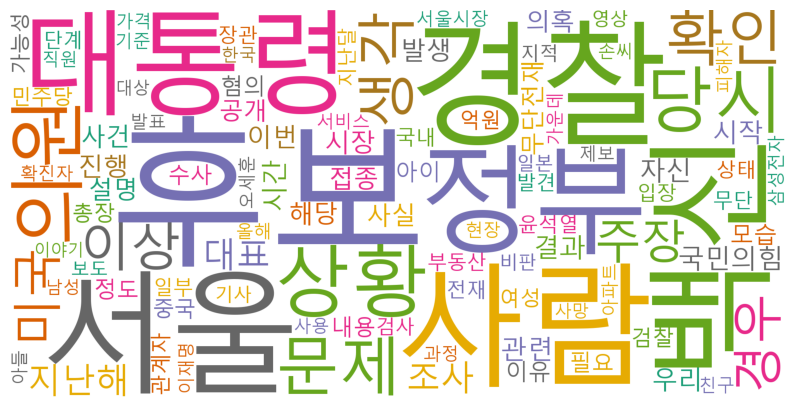

In [58]:
# 워드클라우드 생성
wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(r4)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.imshow(wc)
plt.savefig(foldert + '/result1.png')

21년 3월 4일부터 23년 5월 10일까지   
검색량 상위 100일   
가장 검색이 많았던 날을 1로 하여 각 검색비율에 따라 가중치를 부여하여   
그린 워드클라우드

---

가중치 부여 안했을 때의 워드클라우드

In [59]:
len(con)

16470

In [60]:
df_con2 = pd.DataFrame(con, columns = ["idx",'Contents'])
df_con2

,idx,Contents
0,0,최근 SNS제보를 통해 알려진 격리 장병 '부실 급식' <빗발치는 제보 창구된 '육...
1,1,\t\t\t[뉴스데스크]◀ 앵커 ▶석달을 넘긴 미얀마 사태.MBC가 국내 언론으로는...
2,2,\t\t\t[뉴스투데이]◀ 앵커 ▶미국에서 주류 매장을 운영하는 한인 자매가 괴한에...
3,3,서울 강동경찰서는 길을 가다 만난 60대 남성을 흉기로 찔러 살해한 혐의로 42살 ...
4,4,"사진 제공: 연합뉴스문재인 대통령은 제99회 어린이날을 맞아 ""어린이들이 건강하게 ..."
...,...,...
16465,16465,"손현씨, 블로그 댓글 활동에 대해 언급""더욱 조심해야겠다""SBS '그것이 알고싶다'..."
16466,16466,"유튜브 채널JTVC_제이TVc, 정인 양모 근황 공개'정인 양모 구치소 동료들 목격..."
16467,16467,보수 본산 TK 찾아서도 '朴에 감사하지만 탄핵은 정당' 소신 펼쳐대세론 굳히기 위...
16468,16468,\t\t\t여성 공무원이 민원인의 심한 성희롱 발언에 충격을 받고 기절했다.ⓒ게티이...


In [61]:
text2 = df_con2['Contents']
text_filtered2 = text2.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

C:\Users\inven\AppData\Local\Temp\ipykernel_17772\2283754323.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered2 = text2.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


In [62]:
len(text_filtered2)

16470

In [63]:
tokenized_data_filtered2=[]
for idx, j in enumerate(text_filtered2):
    print("idx =", idx)
    temp2 = tagger.nouns(j)
    temp2 = [word for word in temp2 if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
    temp2 = [word for word in temp2 if word not in stopwords]
    tokenized_data_filtered2.append(temp2)

idx = 0
idx = 1
idx = 2
idx = 3
idx = 4
idx = 5
idx = 6
idx = 7
idx = 8
idx = 9
idx = 10
idx = 11
idx = 12
idx = 13
idx = 14
idx = 15
idx = 16
idx = 17
idx = 18
idx = 19
idx = 20
idx = 21
idx = 22
idx = 23
idx = 24
idx = 25
idx = 26
idx = 27
idx = 28
idx = 29
idx = 30
idx = 31
idx = 32
idx = 33
idx = 34
idx = 35
idx = 36
idx = 37
idx = 38
idx = 39
idx = 40
idx = 41
idx = 42
idx = 43
idx = 44
idx = 45
idx = 46
idx = 47
idx = 48
idx = 49
idx = 50
idx = 51
idx = 52
idx = 53
idx = 54
idx = 55
idx = 56
idx = 57
idx = 58
idx = 59
idx = 60
idx = 61
idx = 62
idx = 63
idx = 64
idx = 65
idx = 66
idx = 67
idx = 68
idx = 69
idx = 70
idx = 71
idx = 72
idx = 73
idx = 74
idx = 75
idx = 76
idx = 77
idx = 78
idx = 79
idx = 80
idx = 81
idx = 82
idx = 83
idx = 84
idx = 85
idx = 86
idx = 87
idx = 88
idx = 89
idx = 90
idx = 91
idx = 92
idx = 93
idx = 94
idx = 95
idx = 96
idx = 97
idx = 98
idx = 99
idx = 100
idx = 101
idx = 102
idx = 103
idx = 104
idx = 105
idx = 106
idx = 107
idx = 108
idx = 109
idx = 110


idx = 831
idx = 832
idx = 833
idx = 834
idx = 835
idx = 836
idx = 837
idx = 838
idx = 839
idx = 840
idx = 841
idx = 842
idx = 843
idx = 844
idx = 845
idx = 846
idx = 847
idx = 848
idx = 849
idx = 850
idx = 851
idx = 852
idx = 853
idx = 854
idx = 855
idx = 856
idx = 857
idx = 858
idx = 859
idx = 860
idx = 861
idx = 862
idx = 863
idx = 864
idx = 865
idx = 866
idx = 867
idx = 868
idx = 869
idx = 870
idx = 871
idx = 872
idx = 873
idx = 874
idx = 875
idx = 876
idx = 877
idx = 878
idx = 879
idx = 880
idx = 881
idx = 882
idx = 883
idx = 884
idx = 885
idx = 886
idx = 887
idx = 888
idx = 889
idx = 890
idx = 891
idx = 892
idx = 893
idx = 894
idx = 895
idx = 896
idx = 897
idx = 898
idx = 899
idx = 900
idx = 901
idx = 902
idx = 903
idx = 904
idx = 905
idx = 906
idx = 907
idx = 908
idx = 909
idx = 910
idx = 911
idx = 912
idx = 913
idx = 914
idx = 915
idx = 916
idx = 917
idx = 918
idx = 919
idx = 920
idx = 921
idx = 922
idx = 923
idx = 924
idx = 925
idx = 926
idx = 927
idx = 928
idx = 929
idx = 930


idx = 1593
idx = 1594
idx = 1595
idx = 1596
idx = 1597
idx = 1598
idx = 1599
idx = 1600
idx = 1601
idx = 1602
idx = 1603
idx = 1604
idx = 1605
idx = 1606
idx = 1607
idx = 1608
idx = 1609
idx = 1610
idx = 1611
idx = 1612
idx = 1613
idx = 1614
idx = 1615
idx = 1616
idx = 1617
idx = 1618
idx = 1619
idx = 1620
idx = 1621
idx = 1622
idx = 1623
idx = 1624
idx = 1625
idx = 1626
idx = 1627
idx = 1628
idx = 1629
idx = 1630
idx = 1631
idx = 1632
idx = 1633
idx = 1634
idx = 1635
idx = 1636
idx = 1637
idx = 1638
idx = 1639
idx = 1640
idx = 1641
idx = 1642
idx = 1643
idx = 1644
idx = 1645
idx = 1646
idx = 1647
idx = 1648
idx = 1649
idx = 1650
idx = 1651
idx = 1652
idx = 1653
idx = 1654
idx = 1655
idx = 1656
idx = 1657
idx = 1658
idx = 1659
idx = 1660
idx = 1661
idx = 1662
idx = 1663
idx = 1664
idx = 1665
idx = 1666
idx = 1667
idx = 1668
idx = 1669
idx = 1670
idx = 1671
idx = 1672
idx = 1673
idx = 1674
idx = 1675
idx = 1676
idx = 1677
idx = 1678
idx = 1679
idx = 1680
idx = 1681
idx = 1682
idx = 1683

idx = 2340
idx = 2341
idx = 2342
idx = 2343
idx = 2344
idx = 2345
idx = 2346
idx = 2347
idx = 2348
idx = 2349
idx = 2350
idx = 2351
idx = 2352
idx = 2353
idx = 2354
idx = 2355
idx = 2356
idx = 2357
idx = 2358
idx = 2359
idx = 2360
idx = 2361
idx = 2362
idx = 2363
idx = 2364
idx = 2365
idx = 2366
idx = 2367
idx = 2368
idx = 2369
idx = 2370
idx = 2371
idx = 2372
idx = 2373
idx = 2374
idx = 2375
idx = 2376
idx = 2377
idx = 2378
idx = 2379
idx = 2380
idx = 2381
idx = 2382
idx = 2383
idx = 2384
idx = 2385
idx = 2386
idx = 2387
idx = 2388
idx = 2389
idx = 2390
idx = 2391
idx = 2392
idx = 2393
idx = 2394
idx = 2395
idx = 2396
idx = 2397
idx = 2398
idx = 2399
idx = 2400
idx = 2401
idx = 2402
idx = 2403
idx = 2404
idx = 2405
idx = 2406
idx = 2407
idx = 2408
idx = 2409
idx = 2410
idx = 2411
idx = 2412
idx = 2413
idx = 2414
idx = 2415
idx = 2416
idx = 2417
idx = 2418
idx = 2419
idx = 2420
idx = 2421
idx = 2422
idx = 2423
idx = 2424
idx = 2425
idx = 2426
idx = 2427
idx = 2428
idx = 2429
idx = 2430

idx = 3087
idx = 3088
idx = 3089
idx = 3090
idx = 3091
idx = 3092
idx = 3093
idx = 3094
idx = 3095
idx = 3096
idx = 3097
idx = 3098
idx = 3099
idx = 3100
idx = 3101
idx = 3102
idx = 3103
idx = 3104
idx = 3105
idx = 3106
idx = 3107
idx = 3108
idx = 3109
idx = 3110
idx = 3111
idx = 3112
idx = 3113
idx = 3114
idx = 3115
idx = 3116
idx = 3117
idx = 3118
idx = 3119
idx = 3120
idx = 3121
idx = 3122
idx = 3123
idx = 3124
idx = 3125
idx = 3126
idx = 3127
idx = 3128
idx = 3129
idx = 3130
idx = 3131
idx = 3132
idx = 3133
idx = 3134
idx = 3135
idx = 3136
idx = 3137
idx = 3138
idx = 3139
idx = 3140
idx = 3141
idx = 3142
idx = 3143
idx = 3144
idx = 3145
idx = 3146
idx = 3147
idx = 3148
idx = 3149
idx = 3150
idx = 3151
idx = 3152
idx = 3153
idx = 3154
idx = 3155
idx = 3156
idx = 3157
idx = 3158
idx = 3159
idx = 3160
idx = 3161
idx = 3162
idx = 3163
idx = 3164
idx = 3165
idx = 3166
idx = 3167
idx = 3168
idx = 3169
idx = 3170
idx = 3171
idx = 3172
idx = 3173
idx = 3174
idx = 3175
idx = 3176
idx = 3177

idx = 3833
idx = 3834
idx = 3835
idx = 3836
idx = 3837
idx = 3838
idx = 3839
idx = 3840
idx = 3841
idx = 3842
idx = 3843
idx = 3844
idx = 3845
idx = 3846
idx = 3847
idx = 3848
idx = 3849
idx = 3850
idx = 3851
idx = 3852
idx = 3853
idx = 3854
idx = 3855
idx = 3856
idx = 3857
idx = 3858
idx = 3859
idx = 3860
idx = 3861
idx = 3862
idx = 3863
idx = 3864
idx = 3865
idx = 3866
idx = 3867
idx = 3868
idx = 3869
idx = 3870
idx = 3871
idx = 3872
idx = 3873
idx = 3874
idx = 3875
idx = 3876
idx = 3877
idx = 3878
idx = 3879
idx = 3880
idx = 3881
idx = 3882
idx = 3883
idx = 3884
idx = 3885
idx = 3886
idx = 3887
idx = 3888
idx = 3889
idx = 3890
idx = 3891
idx = 3892
idx = 3893
idx = 3894
idx = 3895
idx = 3896
idx = 3897
idx = 3898
idx = 3899
idx = 3900
idx = 3901
idx = 3902
idx = 3903
idx = 3904
idx = 3905
idx = 3906
idx = 3907
idx = 3908
idx = 3909
idx = 3910
idx = 3911
idx = 3912
idx = 3913
idx = 3914
idx = 3915
idx = 3916
idx = 3917
idx = 3918
idx = 3919
idx = 3920
idx = 3921
idx = 3922
idx = 3923

idx = 4578
idx = 4579
idx = 4580
idx = 4581
idx = 4582
idx = 4583
idx = 4584
idx = 4585
idx = 4586
idx = 4587
idx = 4588
idx = 4589
idx = 4590
idx = 4591
idx = 4592
idx = 4593
idx = 4594
idx = 4595
idx = 4596
idx = 4597
idx = 4598
idx = 4599
idx = 4600
idx = 4601
idx = 4602
idx = 4603
idx = 4604
idx = 4605
idx = 4606
idx = 4607
idx = 4608
idx = 4609
idx = 4610
idx = 4611
idx = 4612
idx = 4613
idx = 4614
idx = 4615
idx = 4616
idx = 4617
idx = 4618
idx = 4619
idx = 4620
idx = 4621
idx = 4622
idx = 4623
idx = 4624
idx = 4625
idx = 4626
idx = 4627
idx = 4628
idx = 4629
idx = 4630
idx = 4631
idx = 4632
idx = 4633
idx = 4634
idx = 4635
idx = 4636
idx = 4637
idx = 4638
idx = 4639
idx = 4640
idx = 4641
idx = 4642
idx = 4643
idx = 4644
idx = 4645
idx = 4646
idx = 4647
idx = 4648
idx = 4649
idx = 4650
idx = 4651
idx = 4652
idx = 4653
idx = 4654
idx = 4655
idx = 4656
idx = 4657
idx = 4658
idx = 4659
idx = 4660
idx = 4661
idx = 4662
idx = 4663
idx = 4664
idx = 4665
idx = 4666
idx = 4667
idx = 4668

idx = 5323
idx = 5324
idx = 5325
idx = 5326
idx = 5327
idx = 5328
idx = 5329
idx = 5330
idx = 5331
idx = 5332
idx = 5333
idx = 5334
idx = 5335
idx = 5336
idx = 5337
idx = 5338
idx = 5339
idx = 5340
idx = 5341
idx = 5342
idx = 5343
idx = 5344
idx = 5345
idx = 5346
idx = 5347
idx = 5348
idx = 5349
idx = 5350
idx = 5351
idx = 5352
idx = 5353
idx = 5354
idx = 5355
idx = 5356
idx = 5357
idx = 5358
idx = 5359
idx = 5360
idx = 5361
idx = 5362
idx = 5363
idx = 5364
idx = 5365
idx = 5366
idx = 5367
idx = 5368
idx = 5369
idx = 5370
idx = 5371
idx = 5372
idx = 5373
idx = 5374
idx = 5375
idx = 5376
idx = 5377
idx = 5378
idx = 5379
idx = 5380
idx = 5381
idx = 5382
idx = 5383
idx = 5384
idx = 5385
idx = 5386
idx = 5387
idx = 5388
idx = 5389
idx = 5390
idx = 5391
idx = 5392
idx = 5393
idx = 5394
idx = 5395
idx = 5396
idx = 5397
idx = 5398
idx = 5399
idx = 5400
idx = 5401
idx = 5402
idx = 5403
idx = 5404
idx = 5405
idx = 5406
idx = 5407
idx = 5408
idx = 5409
idx = 5410
idx = 5411
idx = 5412
idx = 5413

idx = 6068
idx = 6069
idx = 6070
idx = 6071
idx = 6072
idx = 6073
idx = 6074
idx = 6075
idx = 6076
idx = 6077
idx = 6078
idx = 6079
idx = 6080
idx = 6081
idx = 6082
idx = 6083
idx = 6084
idx = 6085
idx = 6086
idx = 6087
idx = 6088
idx = 6089
idx = 6090
idx = 6091
idx = 6092
idx = 6093
idx = 6094
idx = 6095
idx = 6096
idx = 6097
idx = 6098
idx = 6099
idx = 6100
idx = 6101
idx = 6102
idx = 6103
idx = 6104
idx = 6105
idx = 6106
idx = 6107
idx = 6108
idx = 6109
idx = 6110
idx = 6111
idx = 6112
idx = 6113
idx = 6114
idx = 6115
idx = 6116
idx = 6117
idx = 6118
idx = 6119
idx = 6120
idx = 6121
idx = 6122
idx = 6123
idx = 6124
idx = 6125
idx = 6126
idx = 6127
idx = 6128
idx = 6129
idx = 6130
idx = 6131
idx = 6132
idx = 6133
idx = 6134
idx = 6135
idx = 6136
idx = 6137
idx = 6138
idx = 6139
idx = 6140
idx = 6141
idx = 6142
idx = 6143
idx = 6144
idx = 6145
idx = 6146
idx = 6147
idx = 6148
idx = 6149
idx = 6150
idx = 6151
idx = 6152
idx = 6153
idx = 6154
idx = 6155
idx = 6156
idx = 6157
idx = 6158

idx = 6814
idx = 6815
idx = 6816
idx = 6817
idx = 6818
idx = 6819
idx = 6820
idx = 6821
idx = 6822
idx = 6823
idx = 6824
idx = 6825
idx = 6826
idx = 6827
idx = 6828
idx = 6829
idx = 6830
idx = 6831
idx = 6832
idx = 6833
idx = 6834
idx = 6835
idx = 6836
idx = 6837
idx = 6838
idx = 6839
idx = 6840
idx = 6841
idx = 6842
idx = 6843
idx = 6844
idx = 6845
idx = 6846
idx = 6847
idx = 6848
idx = 6849
idx = 6850
idx = 6851
idx = 6852
idx = 6853
idx = 6854
idx = 6855
idx = 6856
idx = 6857
idx = 6858
idx = 6859
idx = 6860
idx = 6861
idx = 6862
idx = 6863
idx = 6864
idx = 6865
idx = 6866
idx = 6867
idx = 6868
idx = 6869
idx = 6870
idx = 6871
idx = 6872
idx = 6873
idx = 6874
idx = 6875
idx = 6876
idx = 6877
idx = 6878
idx = 6879
idx = 6880
idx = 6881
idx = 6882
idx = 6883
idx = 6884
idx = 6885
idx = 6886
idx = 6887
idx = 6888
idx = 6889
idx = 6890
idx = 6891
idx = 6892
idx = 6893
idx = 6894
idx = 6895
idx = 6896
idx = 6897
idx = 6898
idx = 6899
idx = 6900
idx = 6901
idx = 6902
idx = 6903
idx = 6904

idx = 7560
idx = 7561
idx = 7562
idx = 7563
idx = 7564
idx = 7565
idx = 7566
idx = 7567
idx = 7568
idx = 7569
idx = 7570
idx = 7571
idx = 7572
idx = 7573
idx = 7574
idx = 7575
idx = 7576
idx = 7577
idx = 7578
idx = 7579
idx = 7580
idx = 7581
idx = 7582
idx = 7583
idx = 7584
idx = 7585
idx = 7586
idx = 7587
idx = 7588
idx = 7589
idx = 7590
idx = 7591
idx = 7592
idx = 7593
idx = 7594
idx = 7595
idx = 7596
idx = 7597
idx = 7598
idx = 7599
idx = 7600
idx = 7601
idx = 7602
idx = 7603
idx = 7604
idx = 7605
idx = 7606
idx = 7607
idx = 7608
idx = 7609
idx = 7610
idx = 7611
idx = 7612
idx = 7613
idx = 7614
idx = 7615
idx = 7616
idx = 7617
idx = 7618
idx = 7619
idx = 7620
idx = 7621
idx = 7622
idx = 7623
idx = 7624
idx = 7625
idx = 7626
idx = 7627
idx = 7628
idx = 7629
idx = 7630
idx = 7631
idx = 7632
idx = 7633
idx = 7634
idx = 7635
idx = 7636
idx = 7637
idx = 7638
idx = 7639
idx = 7640
idx = 7641
idx = 7642
idx = 7643
idx = 7644
idx = 7645
idx = 7646
idx = 7647
idx = 7648
idx = 7649
idx = 7650

idx = 8305
idx = 8306
idx = 8307
idx = 8308
idx = 8309
idx = 8310
idx = 8311
idx = 8312
idx = 8313
idx = 8314
idx = 8315
idx = 8316
idx = 8317
idx = 8318
idx = 8319
idx = 8320
idx = 8321
idx = 8322
idx = 8323
idx = 8324
idx = 8325
idx = 8326
idx = 8327
idx = 8328
idx = 8329
idx = 8330
idx = 8331
idx = 8332
idx = 8333
idx = 8334
idx = 8335
idx = 8336
idx = 8337
idx = 8338
idx = 8339
idx = 8340
idx = 8341
idx = 8342
idx = 8343
idx = 8344
idx = 8345
idx = 8346
idx = 8347
idx = 8348
idx = 8349
idx = 8350
idx = 8351
idx = 8352
idx = 8353
idx = 8354
idx = 8355
idx = 8356
idx = 8357
idx = 8358
idx = 8359
idx = 8360
idx = 8361
idx = 8362
idx = 8363
idx = 8364
idx = 8365
idx = 8366
idx = 8367
idx = 8368
idx = 8369
idx = 8370
idx = 8371
idx = 8372
idx = 8373
idx = 8374
idx = 8375
idx = 8376
idx = 8377
idx = 8378
idx = 8379
idx = 8380
idx = 8381
idx = 8382
idx = 8383
idx = 8384
idx = 8385
idx = 8386
idx = 8387
idx = 8388
idx = 8389
idx = 8390
idx = 8391
idx = 8392
idx = 8393
idx = 8394
idx = 8395

idx = 9050
idx = 9051
idx = 9052
idx = 9053
idx = 9054
idx = 9055
idx = 9056
idx = 9057
idx = 9058
idx = 9059
idx = 9060
idx = 9061
idx = 9062
idx = 9063
idx = 9064
idx = 9065
idx = 9066
idx = 9067
idx = 9068
idx = 9069
idx = 9070
idx = 9071
idx = 9072
idx = 9073
idx = 9074
idx = 9075
idx = 9076
idx = 9077
idx = 9078
idx = 9079
idx = 9080
idx = 9081
idx = 9082
idx = 9083
idx = 9084
idx = 9085
idx = 9086
idx = 9087
idx = 9088
idx = 9089
idx = 9090
idx = 9091
idx = 9092
idx = 9093
idx = 9094
idx = 9095
idx = 9096
idx = 9097
idx = 9098
idx = 9099
idx = 9100
idx = 9101
idx = 9102
idx = 9103
idx = 9104
idx = 9105
idx = 9106
idx = 9107
idx = 9108
idx = 9109
idx = 9110
idx = 9111
idx = 9112
idx = 9113
idx = 9114
idx = 9115
idx = 9116
idx = 9117
idx = 9118
idx = 9119
idx = 9120
idx = 9121
idx = 9122
idx = 9123
idx = 9124
idx = 9125
idx = 9126
idx = 9127
idx = 9128
idx = 9129
idx = 9130
idx = 9131
idx = 9132
idx = 9133
idx = 9134
idx = 9135
idx = 9136
idx = 9137
idx = 9138
idx = 9139
idx = 9140

idx = 9795
idx = 9796
idx = 9797
idx = 9798
idx = 9799
idx = 9800
idx = 9801
idx = 9802
idx = 9803
idx = 9804
idx = 9805
idx = 9806
idx = 9807
idx = 9808
idx = 9809
idx = 9810
idx = 9811
idx = 9812
idx = 9813
idx = 9814
idx = 9815
idx = 9816
idx = 9817
idx = 9818
idx = 9819
idx = 9820
idx = 9821
idx = 9822
idx = 9823
idx = 9824
idx = 9825
idx = 9826
idx = 9827
idx = 9828
idx = 9829
idx = 9830
idx = 9831
idx = 9832
idx = 9833
idx = 9834
idx = 9835
idx = 9836
idx = 9837
idx = 9838
idx = 9839
idx = 9840
idx = 9841
idx = 9842
idx = 9843
idx = 9844
idx = 9845
idx = 9846
idx = 9847
idx = 9848
idx = 9849
idx = 9850
idx = 9851
idx = 9852
idx = 9853
idx = 9854
idx = 9855
idx = 9856
idx = 9857
idx = 9858
idx = 9859
idx = 9860
idx = 9861
idx = 9862
idx = 9863
idx = 9864
idx = 9865
idx = 9866
idx = 9867
idx = 9868
idx = 9869
idx = 9870
idx = 9871
idx = 9872
idx = 9873
idx = 9874
idx = 9875
idx = 9876
idx = 9877
idx = 9878
idx = 9879
idx = 9880
idx = 9881
idx = 9882
idx = 9883
idx = 9884
idx = 9885

idx = 10495
idx = 10496
idx = 10497
idx = 10498
idx = 10499
idx = 10500
idx = 10501
idx = 10502
idx = 10503
idx = 10504
idx = 10505
idx = 10506
idx = 10507
idx = 10508
idx = 10509
idx = 10510
idx = 10511
idx = 10512
idx = 10513
idx = 10514
idx = 10515
idx = 10516
idx = 10517
idx = 10518
idx = 10519
idx = 10520
idx = 10521
idx = 10522
idx = 10523
idx = 10524
idx = 10525
idx = 10526
idx = 10527
idx = 10528
idx = 10529
idx = 10530
idx = 10531
idx = 10532
idx = 10533
idx = 10534
idx = 10535
idx = 10536
idx = 10537
idx = 10538
idx = 10539
idx = 10540
idx = 10541
idx = 10542
idx = 10543
idx = 10544
idx = 10545
idx = 10546
idx = 10547
idx = 10548
idx = 10549
idx = 10550
idx = 10551
idx = 10552
idx = 10553
idx = 10554
idx = 10555
idx = 10556
idx = 10557
idx = 10558
idx = 10559
idx = 10560
idx = 10561
idx = 10562
idx = 10563
idx = 10564
idx = 10565
idx = 10566
idx = 10567
idx = 10568
idx = 10569
idx = 10570
idx = 10571
idx = 10572
idx = 10573
idx = 10574
idx = 10575
idx = 10576
idx = 10577
idx 

idx = 11178
idx = 11179
idx = 11180
idx = 11181
idx = 11182
idx = 11183
idx = 11184
idx = 11185
idx = 11186
idx = 11187
idx = 11188
idx = 11189
idx = 11190
idx = 11191
idx = 11192
idx = 11193
idx = 11194
idx = 11195
idx = 11196
idx = 11197
idx = 11198
idx = 11199
idx = 11200
idx = 11201
idx = 11202
idx = 11203
idx = 11204
idx = 11205
idx = 11206
idx = 11207
idx = 11208
idx = 11209
idx = 11210
idx = 11211
idx = 11212
idx = 11213
idx = 11214
idx = 11215
idx = 11216
idx = 11217
idx = 11218
idx = 11219
idx = 11220
idx = 11221
idx = 11222
idx = 11223
idx = 11224
idx = 11225
idx = 11226
idx = 11227
idx = 11228
idx = 11229
idx = 11230
idx = 11231
idx = 11232
idx = 11233
idx = 11234
idx = 11235
idx = 11236
idx = 11237
idx = 11238
idx = 11239
idx = 11240
idx = 11241
idx = 11242
idx = 11243
idx = 11244
idx = 11245
idx = 11246
idx = 11247
idx = 11248
idx = 11249
idx = 11250
idx = 11251
idx = 11252
idx = 11253
idx = 11254
idx = 11255
idx = 11256
idx = 11257
idx = 11258
idx = 11259
idx = 11260
idx 

idx = 11863
idx = 11864
idx = 11865
idx = 11866
idx = 11867
idx = 11868
idx = 11869
idx = 11870
idx = 11871
idx = 11872
idx = 11873
idx = 11874
idx = 11875
idx = 11876
idx = 11877
idx = 11878
idx = 11879
idx = 11880
idx = 11881
idx = 11882
idx = 11883
idx = 11884
idx = 11885
idx = 11886
idx = 11887
idx = 11888
idx = 11889
idx = 11890
idx = 11891
idx = 11892
idx = 11893
idx = 11894
idx = 11895
idx = 11896
idx = 11897
idx = 11898
idx = 11899
idx = 11900
idx = 11901
idx = 11902
idx = 11903
idx = 11904
idx = 11905
idx = 11906
idx = 11907
idx = 11908
idx = 11909
idx = 11910
idx = 11911
idx = 11912
idx = 11913
idx = 11914
idx = 11915
idx = 11916
idx = 11917
idx = 11918
idx = 11919
idx = 11920
idx = 11921
idx = 11922
idx = 11923
idx = 11924
idx = 11925
idx = 11926
idx = 11927
idx = 11928
idx = 11929
idx = 11930
idx = 11931
idx = 11932
idx = 11933
idx = 11934
idx = 11935
idx = 11936
idx = 11937
idx = 11938
idx = 11939
idx = 11940
idx = 11941
idx = 11942
idx = 11943
idx = 11944
idx = 11945
idx 

idx = 12546
idx = 12547
idx = 12548
idx = 12549
idx = 12550
idx = 12551
idx = 12552
idx = 12553
idx = 12554
idx = 12555
idx = 12556
idx = 12557
idx = 12558
idx = 12559
idx = 12560
idx = 12561
idx = 12562
idx = 12563
idx = 12564
idx = 12565
idx = 12566
idx = 12567
idx = 12568
idx = 12569
idx = 12570
idx = 12571
idx = 12572
idx = 12573
idx = 12574
idx = 12575
idx = 12576
idx = 12577
idx = 12578
idx = 12579
idx = 12580
idx = 12581
idx = 12582
idx = 12583
idx = 12584
idx = 12585
idx = 12586
idx = 12587
idx = 12588
idx = 12589
idx = 12590
idx = 12591
idx = 12592
idx = 12593
idx = 12594
idx = 12595
idx = 12596
idx = 12597
idx = 12598
idx = 12599
idx = 12600
idx = 12601
idx = 12602
idx = 12603
idx = 12604
idx = 12605
idx = 12606
idx = 12607
idx = 12608
idx = 12609
idx = 12610
idx = 12611
idx = 12612
idx = 12613
idx = 12614
idx = 12615
idx = 12616
idx = 12617
idx = 12618
idx = 12619
idx = 12620
idx = 12621
idx = 12622
idx = 12623
idx = 12624
idx = 12625
idx = 12626
idx = 12627
idx = 12628
idx 

idx = 13229
idx = 13230
idx = 13231
idx = 13232
idx = 13233
idx = 13234
idx = 13235
idx = 13236
idx = 13237
idx = 13238
idx = 13239
idx = 13240
idx = 13241
idx = 13242
idx = 13243
idx = 13244
idx = 13245
idx = 13246
idx = 13247
idx = 13248
idx = 13249
idx = 13250
idx = 13251
idx = 13252
idx = 13253
idx = 13254
idx = 13255
idx = 13256
idx = 13257
idx = 13258
idx = 13259
idx = 13260
idx = 13261
idx = 13262
idx = 13263
idx = 13264
idx = 13265
idx = 13266
idx = 13267
idx = 13268
idx = 13269
idx = 13270
idx = 13271
idx = 13272
idx = 13273
idx = 13274
idx = 13275
idx = 13276
idx = 13277
idx = 13278
idx = 13279
idx = 13280
idx = 13281
idx = 13282
idx = 13283
idx = 13284
idx = 13285
idx = 13286
idx = 13287
idx = 13288
idx = 13289
idx = 13290
idx = 13291
idx = 13292
idx = 13293
idx = 13294
idx = 13295
idx = 13296
idx = 13297
idx = 13298
idx = 13299
idx = 13300
idx = 13301
idx = 13302
idx = 13303
idx = 13304
idx = 13305
idx = 13306
idx = 13307
idx = 13308
idx = 13309
idx = 13310
idx = 13311
idx 

idx = 13912
idx = 13913
idx = 13914
idx = 13915
idx = 13916
idx = 13917
idx = 13918
idx = 13919
idx = 13920
idx = 13921
idx = 13922
idx = 13923
idx = 13924
idx = 13925
idx = 13926
idx = 13927
idx = 13928
idx = 13929
idx = 13930
idx = 13931
idx = 13932
idx = 13933
idx = 13934
idx = 13935
idx = 13936
idx = 13937
idx = 13938
idx = 13939
idx = 13940
idx = 13941
idx = 13942
idx = 13943
idx = 13944
idx = 13945
idx = 13946
idx = 13947
idx = 13948
idx = 13949
idx = 13950
idx = 13951
idx = 13952
idx = 13953
idx = 13954
idx = 13955
idx = 13956
idx = 13957
idx = 13958
idx = 13959
idx = 13960
idx = 13961
idx = 13962
idx = 13963
idx = 13964
idx = 13965
idx = 13966
idx = 13967
idx = 13968
idx = 13969
idx = 13970
idx = 13971
idx = 13972
idx = 13973
idx = 13974
idx = 13975
idx = 13976
idx = 13977
idx = 13978
idx = 13979
idx = 13980
idx = 13981
idx = 13982
idx = 13983
idx = 13984
idx = 13985
idx = 13986
idx = 13987
idx = 13988
idx = 13989
idx = 13990
idx = 13991
idx = 13992
idx = 13993
idx = 13994
idx 

idx = 14596
idx = 14597
idx = 14598
idx = 14599
idx = 14600
idx = 14601
idx = 14602
idx = 14603
idx = 14604
idx = 14605
idx = 14606
idx = 14607
idx = 14608
idx = 14609
idx = 14610
idx = 14611
idx = 14612
idx = 14613
idx = 14614
idx = 14615
idx = 14616
idx = 14617
idx = 14618
idx = 14619
idx = 14620
idx = 14621
idx = 14622
idx = 14623
idx = 14624
idx = 14625
idx = 14626
idx = 14627
idx = 14628
idx = 14629
idx = 14630
idx = 14631
idx = 14632
idx = 14633
idx = 14634
idx = 14635
idx = 14636
idx = 14637
idx = 14638
idx = 14639
idx = 14640
idx = 14641
idx = 14642
idx = 14643
idx = 14644
idx = 14645
idx = 14646
idx = 14647
idx = 14648
idx = 14649
idx = 14650
idx = 14651
idx = 14652
idx = 14653
idx = 14654
idx = 14655
idx = 14656
idx = 14657
idx = 14658
idx = 14659
idx = 14660
idx = 14661
idx = 14662
idx = 14663
idx = 14664
idx = 14665
idx = 14666
idx = 14667
idx = 14668
idx = 14669
idx = 14670
idx = 14671
idx = 14672
idx = 14673
idx = 14674
idx = 14675
idx = 14676
idx = 14677
idx = 14678
idx 

idx = 15280
idx = 15281
idx = 15282
idx = 15283
idx = 15284
idx = 15285
idx = 15286
idx = 15287
idx = 15288
idx = 15289
idx = 15290
idx = 15291
idx = 15292
idx = 15293
idx = 15294
idx = 15295
idx = 15296
idx = 15297
idx = 15298
idx = 15299
idx = 15300
idx = 15301
idx = 15302
idx = 15303
idx = 15304
idx = 15305
idx = 15306
idx = 15307
idx = 15308
idx = 15309
idx = 15310
idx = 15311
idx = 15312
idx = 15313
idx = 15314
idx = 15315
idx = 15316
idx = 15317
idx = 15318
idx = 15319
idx = 15320
idx = 15321
idx = 15322
idx = 15323
idx = 15324
idx = 15325
idx = 15326
idx = 15327
idx = 15328
idx = 15329
idx = 15330
idx = 15331
idx = 15332
idx = 15333
idx = 15334
idx = 15335
idx = 15336
idx = 15337
idx = 15338
idx = 15339
idx = 15340
idx = 15341
idx = 15342
idx = 15343
idx = 15344
idx = 15345
idx = 15346
idx = 15347
idx = 15348
idx = 15349
idx = 15350
idx = 15351
idx = 15352
idx = 15353
idx = 15354
idx = 15355
idx = 15356
idx = 15357
idx = 15358
idx = 15359
idx = 15360
idx = 15361
idx = 15362
idx 

idx = 15964
idx = 15965
idx = 15966
idx = 15967
idx = 15968
idx = 15969
idx = 15970
idx = 15971
idx = 15972
idx = 15973
idx = 15974
idx = 15975
idx = 15976
idx = 15977
idx = 15978
idx = 15979
idx = 15980
idx = 15981
idx = 15982
idx = 15983
idx = 15984
idx = 15985
idx = 15986
idx = 15987
idx = 15988
idx = 15989
idx = 15990
idx = 15991
idx = 15992
idx = 15993
idx = 15994
idx = 15995
idx = 15996
idx = 15997
idx = 15998
idx = 15999
idx = 16000
idx = 16001
idx = 16002
idx = 16003
idx = 16004
idx = 16005
idx = 16006
idx = 16007
idx = 16008
idx = 16009
idx = 16010
idx = 16011
idx = 16012
idx = 16013
idx = 16014
idx = 16015
idx = 16016
idx = 16017
idx = 16018
idx = 16019
idx = 16020
idx = 16021
idx = 16022
idx = 16023
idx = 16024
idx = 16025
idx = 16026
idx = 16027
idx = 16028
idx = 16029
idx = 16030
idx = 16031
idx = 16032
idx = 16033
idx = 16034
idx = 16035
idx = 16036
idx = 16037
idx = 16038
idx = 16039
idx = 16040
idx = 16041
idx = 16042
idx = 16043
idx = 16044
idx = 16045
idx = 16046
idx 

In [64]:
len(tokenized_data_filtered2)

16470

In [65]:
tokens2=[]
for k in tokenized_data_filtered2:
    tokens2.extend(k)

num_top_tokens=100

counted_tokens2=Counter(tokens2)
top_keywords2=dict(counted_tokens2.most_common(num_top_tokens))
tk_df2 = pd.DataFrame(list(top_keywords2.items()), columns=['keywords','freq'])
print("DONE")

DONE


In [66]:
len(tk_df2)

100

In [68]:
tk_df2.to_csv(foldert + "/tk_df2.csv", encoding="utf-8-sig")

In [69]:
r5 = tk_df2.set_index("keywords").T.to_dict('records')
r5

[{'후보': 20148,
  '경찰': 11943,
  '사람': 11708,
  '백신': 11290,
  '서울': 11163,
  '대통령': 10373,
  '정부': 10166,
  '의원': 10076,
  '상황': 9356,
  '문제': 8925,
  '당시': 8773,
  '국민의힘': 8327,
  '생각': 8325,
  '미국': 8286,
  '확인': 8253,
  '대표': 8245,
  '경우': 8125,
  '이상': 8096,
  '주장': 7820,
  '조사': 7537,
  '지난해': 7501,
  '자신': 7442,
  '시간': 7316,
  '시장': 7239,
  '우리': 7231,
  '관련': 7186,
  '결과': 7091,
  '이번': 7057,
  '공개': 6819,
  '사건': 6556,
  '시작': 6412,
  '사실': 6334,
  '의혹': 6332,
  '진행': 6329,
  '발생': 6314,
  '접종': 6267,
  '해당': 6174,
  '설명': 6061,
  '중국': 5850,
  '모습': 5700,
  '무단전재': 5621,
  '아이': 5606,
  '정도': 5566,
  '이유': 5520,
  '내용': 5486,
  '민주당': 5476,
  '억원': 5438,
  '필요': 5410,
  '혐의': 5386,
  '여성': 5381,
  '수사': 5156,
  '검찰': 4928,
  '국내': 4921,
  '영상': 4890,
  '윤석열': 4857,
  '관계자': 4773,
  '가능성': 4750,
  '상태': 4722,
  '지적': 4683,
  '일부': 4670,
  '입장': 4665,
  '검사': 4493,
  '지난달': 4477,
  '보도': 4463,
  '발견': 4443,
  '현장': 4409,
  '한국': 4365,
  '올해': 4344,
  '기사': 4325,
  '발표': 4277,
 

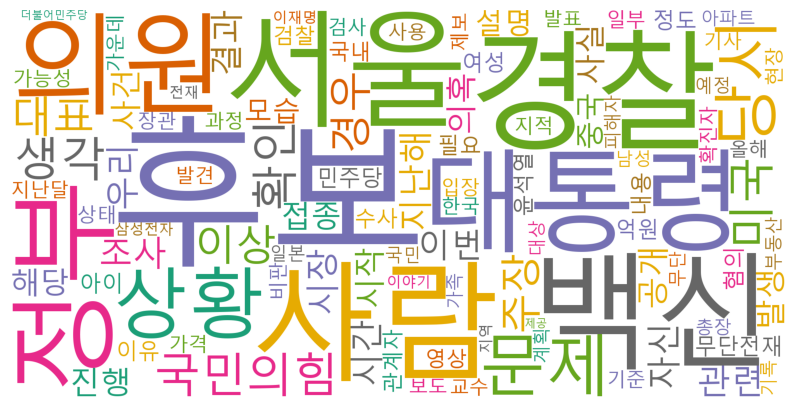

In [70]:
# 워드클라우드 생성
wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(*r5)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.imshow(wc)
plt.savefig(foldert + '/result2.png')

In [71]:
b2

[20210505,
 20211025,
 20221015,
 20210304,
 20210305,
 20210306,
 20211005,
 20221030,
 20210310,
 20210309,
 20210323,
 20210312,
 20210320,
 20210308,
 20210307,
 20230420,
 20210311,
 20210313,
 20210314,
 20210325,
 20210315,
 20210316,
 20210412,
 20230129,
 20221230,
 20210506,
 20210324,
 20211123,
 20210317,
 20210326,
 20210318,
 20211018,
 20211002,
 20210319,
 20210329,
 20220608,
 20210327,
 20220224,
 20210607,
 20210407,
 20210321,
 20210322,
 20211214,
 20210417,
 20210408,
 20210330,
 20210401,
 20210413,
 20210513,
 20210328,
 20210402,
 20210409,
 20210331,
 20210426,
 20220207,
 20210405,
 20210430,
 20210411,
 20210427,
 20210608,
 20210609,
 20210414,
 20210419,
 20210416,
 20210519,
 20210403,
 20210418,
 20221016,
 20210406,
 20211216,
 20220708,
 20230510,
 20210420,
 20210530,
 20210410,
 20210404,
 20210423,
 20210507,
 20230509,
 20221004,
 20210415,
 20221102,
 20210504,
 20220101,
 20210514,
 20211019,
 20210902,
 20210428,
 20210429,
 20210424,
 20210610,